<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

Property flipping is an investment strategy of purchasing a property with a short holding period with the intent of selling it for a quick profit. All investments have risks. 

To help novice property flippers manage risks, we will provide consultation upon application, based on our home valuation application that predicts the sale prices of homes in Ames, Iowa. We have modeled Linear Regression, Ridge, Lasso and Elastic Net models. The sale price prediction is also helpful for property buyers or sellers.

To better manage risks for new property flippers, we recommend the Reno Flip. The reno flip, in which a property flipper improves undervalued properties with renovations and/or cosmetic changes, is deemed less risky. 

Thus, our recommendations will focus on features that are more likely to increase property value when renovated, and which features to de-prioritise.

### Contents:
- [Background](#Background)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Cleaned Dataset](#Cleaned-Dataset)

# Background

Property flipping is an investment strategy of purchasing a property with a short holding period with the intent of selling it for a quick profit. All investments have risks. 

The first type is where real estate investors target properties that are in a rapidly appreciating market and resell with little or no additional investment in the physical property. This is a play on the market conditions rather than the property itself.

The second type is a quick fix flip where a real estate investor uses his knowledge of what buyers want to improve undervalued properties with renovations and/or cosmetic changes, known as a reno flip. The reno flip is considered less risky, and real value is added to the property through renovation.


# Data

*Kaggle's Ames Housing Data sets were provided as part of project material*
* [`train.csv`](./datasets/train.csv): Training dataset

*Together with the data documentation of the Ames Housing dataset*
* [`Data document`](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt): Ames Housing data document explaining the variables of the columns and inputs


# Outside Research

1.Basic readings related to property flipping as an investment

https://www.investopedia.com/articles/mortgages-real-estate/08/house-flip.asp
https://www.investopedia.com/terms/f/flipping.asp
https://www.propertyguru.com.sg/property-guides/property-flipping-singapore-boomer-millennial-28396

2.Readings on how the limited access to information for a home buyer/seller can lead to loss in profits, thereby making a case for a property valuation tool

https://www.cbsnews.com/news/home-appraisal-race-lawsuit/
https://www.bostonfed.org/-/media/Documents/conference/36/conf36g.pdf?la=en
https://www.statista.com/statistics/226144/us-existing-home-sales/
https://ideas.repec.org/a/tpr/restat/v90y2008i4p599-611.html
https://fred.stlouisfed.org/series/ASPUS

3.Readings on actual Property Flipping agency in Ames and their metrics for property flipping

https://newsilver.com/flipping-houses-in/ames-ia/
https://newsilver.com/the-lender/flipping-houses-in-iowa/
https://newsilver.com/the-lender/how-to-calculate-arv-simple-guide/

4.Renovation cost estimator by actual Ames company

https://www.homeyou.com/ia/chimney-repair-ames-costs

5.Information on the two most important rooms that affect sale price in a home. The kitchen & the master bedroom toilet. 

https://www.trulia.com/blog/2-most-important-rooms-in-a-house/

6.Very helpful sites for their analysis and codes

https://www.analyticsvidhya.com/blog/2021/05/yellowbrick-visualization-for-model-predictions/
https://medium.com/mlearning-ai/a-thorough-dive-into-the-ames-iowa-housing-dataset-part-1-of-5-7205093a5a53
https://nycdatascience.com/blog/student-works/predicting-housing-prices-in-ames-iowa-6/
https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96
https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
https://www.youtube.com/watch?v=VSeGseoJsNA
https://web.missouri.edu/segerti/capstone/northcraft_neale.pdf

# Data Cleaning

- Are missing values imputed appropriately? - yes
- Are distributions examined and described? - yes
- Are outliers identified and addressed? - yes
- Are appropriate summary statistics provided? - yes
- Are steps taken during data cleaning and EDA framed appropriately? - yes
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA? - possibly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('../datasets/train.csv')
#want to change columns names to lower/snake_case so a little easier to work with
df.columns = df.columns.str.lower().str.replace(' ', '_')
#increase pandas default columns/rows so I can view all at once
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

df.sample(10)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
193    382  527359050           20        RL          80.0     10400   Pave   
1599   778  905200260           80        RL          88.0     15400   Pave   
1801  1261  535402120           60        RL          70.0      9247   Pave   
246   2328  527190050          160        RL          44.0      5306   Pave   
1781  1084  528228465           20        RL          43.0      3182   Pave   
765   1862  533352075           90        RL           NaN     18890   Pave   
2016   560  532376110           20        RL           NaN      7791   Pave   
307   2594  535354130           50        RL          50.0      7500   Pave   
1841  2668  902401090           90        RM          33.0      5976   Pave   
1507  2743  905452150           50        RL          75.0      9525   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
193    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1599   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1801   NaN       IR1          Lvl    AllPub     Inside        Gtl   
246    NaN       IR1          Lvl    AllPub     Inside        Gtl   
1781   NaN       Reg          Lvl    AllPub     Inside        Gtl   
765    NaN       IR1          Lvl    AllPub     Inside        Gtl   
2016   NaN       IR1          Lvl    AllPub     Inside        Gtl   
307    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1841   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1507   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
193        NWAmes        Norm        Norm      1Fam      1Story             7   
1599       Sawyer        Norm        Norm      1Fam        SLvl             5   
1801        NAmes        Norm        Norm      1Fam      2Story             6   
246       StoneBr        Norm        Norm    TwnhsE      2Story             7   
1781      Blmngtn        Norm        Norm      1Fam      1Story             7   
765        Sawyer       Feedr        RRAe    Duplex      1.5Fin             5   
2016       Sawyer        RRAe        Norm      1Fam      1Story             5   
307         NAmes        Norm        Norm      1Fam      1.5Fin             6   
1841      OldTown        Norm        Norm    Duplex      2Story             5   
1507      Edwards        Norm        Norm      1Fam      1.5Fin             6   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
193              5        1976            1976      Gable   CompShg   
1599             5        1961            1961        Hip   CompShg   
1801             6        1962            1962      Gable   CompShg   
246              7        1987            1987      Gable   CompShg   
1781             5        2007            2007      Gable   CompShg   
765              5        1977            1977       Shed   CompShg   
2016             8        1963            1995      Gable   CompShg   
307              6        1947            1950      Gable   CompShg   
1841             7        1920            1950        Hip   CompShg   
1507             5        1953            1953      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
193       HdBoard      HdBoard      BrkFace         189.0         TA   
1599      HdBoard      HdBoard         None           0.0         TA   
1801      HdBoard      HdBoard      BrkFace         318.0         TA   
246       HdBoard      HdBoard         None           0.0         Gd   
1781      VinylSd      VinylSd      BrkFace          16.0         Gd   
765       Plywood      Plywood         None           1.0         TA   
2016      Plywood      Plywood         None           0.0         Gd   
307       VinylSd      VinylSd         None           0.0         TA   
1841      Wd Sdng      Wd Sdng         None           0.

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

((2051, 81), None)

In [4]:
df.describe(include='all').T

count unique      top  freq              mean  \
id               2051.0    NaN      NaN   NaN       1474.033642   
pid              2051.0    NaN      NaN   NaN  713590006.091663   
ms_subclass      2051.0    NaN      NaN   NaN         57.008776   
ms_zoning          2051      7       RL  1598               NaN   
lot_frontage     1721.0    NaN      NaN   NaN           69.0552   
lot_area         2051.0    NaN      NaN   NaN      10065.208191   
street             2051      2     Pave  2044               NaN   
alley               140      2     Grvl    85               NaN   
lot_shape          2051      4      Reg  1295               NaN   
land_contour       2051      4      Lvl  1843               NaN   
utilities          2051      3   AllPub  2049               NaN   
lot_config         2051      5   Inside  1503               NaN   
land_slope         2051      3      Gtl  1953               NaN   
neighborhood       2051     28    NAmes   310               NaN   
condition_1        2051      9     Norm  1767               NaN   
condition_2        2051      8     Norm  2025               NaN   
bldg_type          2051      5     1Fam  1700               NaN   
house_style        2051      8   1Story  1059               NaN   
overall_qual     2051.0    NaN      NaN   NaN           6.11214   
overall_cond     2051.0    NaN      NaN   NaN          5.562165   
year_built       2051.0    NaN      NaN   NaN       1971.708922   
year_remod/add   2051.0    NaN      NaN   NaN       1984.190151   
roof_style         2051      6    Gable  1619               NaN   
roof_matl          2051      6  CompShg  2025               NaN   
exterior_1st       2051     15  VinylSd   724               NaN   
exterior_2nd       2051     15  VinylSd   721               NaN   
mas_vnr_type       2029      4     None  1218               NaN   
mas_vnr_area     2029.0    NaN      NaN   NaN         99.695909   
exter_qual         2051      4       TA  1247               NaN   
exter_cond         2051      5       TA  1778               NaN   
foundation         2051      6    PConc   926               NaN   
bsmt_qual          1996      5       TA   887               NaN   
bsmt_cond          1996      5       TA  1834               NaN   
bsmt_exposure      1993      4       No  1339               NaN   
bsmtfin_type_1     1996      6      GLQ   615               NaN   
bsmtfin_sf_1     2050.0    NaN      NaN   NaN        442.300488   
bsmtfin_type_2     1995      6      Unf  1749               NaN   
bsmtfin_sf_2     2050.0    NaN      NaN   NaN         47.959024   
bsmt_unf_sf      2050.0    NaN      NaN   NaN        567.728293   
total_bsmt_sf    2050.0    NaN      NaN   NaN       1057.987805   
heating            2051      5     GasA  2018               NaN   
heating_qc         2051      5       Ex  1065               NaN   
central_air        2051      2        Y  1910               NaN   
electrical         2051      5    SBrkr  1868               NaN   
1st_flr_sf       2051.0    NaN      NaN   NaN       1164.488055   
2nd_flr_sf       2051.0    NaN      NaN   NaN        329.329108   
low_qual_fin_sf  2051.0    NaN      NaN   NaN          5.512921   
gr_liv_area      2051.0    NaN      NaN   NaN       1499.330083   
bsmt_full_bath   2049.0    NaN      NaN   NaN          0.427526   
bsmt_half_bath   2049.0    NaN      NaN   NaN          0.063446   
full_bath        2051.0    NaN      NaN   NaN          1.577279   
half_bath        2051.0    NaN      NaN   NaN          0.371039   
bedroom_abvgr    2051.0    NaN      NaN   NaN          2.843491   
kitchen_abvgr    2051.0    NaN      NaN   NaN          1.042906   
kitchen_qual       2051      4       TA  1047               NaN   
totrms_abvgrd    2051.0    NaN      NaN   NaN          6.435885   
functional         2051      8      Typ  1915               NaN   
fireplaces       2051.0    NaN      NaN   NaN          0.590931   
fireplace_qu       1051      5       Gd   523               NaN  

In [5]:
#Investigate nulls
df.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [6]:
# Repair spelling and whitespace mistakes.
df["bldg_type"] = df["bldg_type"].replace(to_replace="2fmCon", value="2FmCon")
df["bldg_type"] = df["bldg_type"].replace(to_replace="Duplex", value="Duplx")
df["bldg_type"] = df["bldg_type"].replace(to_replace="Twnhs", value="TwnhsI")
df["exterior_2nd"] = df["exterior_2nd"].replace(to_replace="Brk Cmn", value="BrkComm")
df["exterior_2nd"] = df["exterior_2nd"].replace(to_replace="CmentBd", value="CemntBd")
df["exterior_2nd"] = df["exterior_2nd"].replace(to_replace="Wd Shng", value="WdShing")
df["ms_zoning"] = df["ms_zoning"].replace(to_replace="A (agr)", value="A")
df["ms_zoning"] = df["ms_zoning"].replace(to_replace="C (all)", value="C")
df["ms_zoning"] = df["ms_zoning"].replace(to_replace="I (all)", value="I")
df["neighborhood"] = df["neighborhood"].replace(to_replace="NAmes", value="Names")
df["sale_type"] = df["sale_type"].replace(to_replace="WD ", value="WD")

In [7]:
#Focusing on the columns with null values only
null_value_df = df.columns[df.isnull().any()].tolist()
null_value_df

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

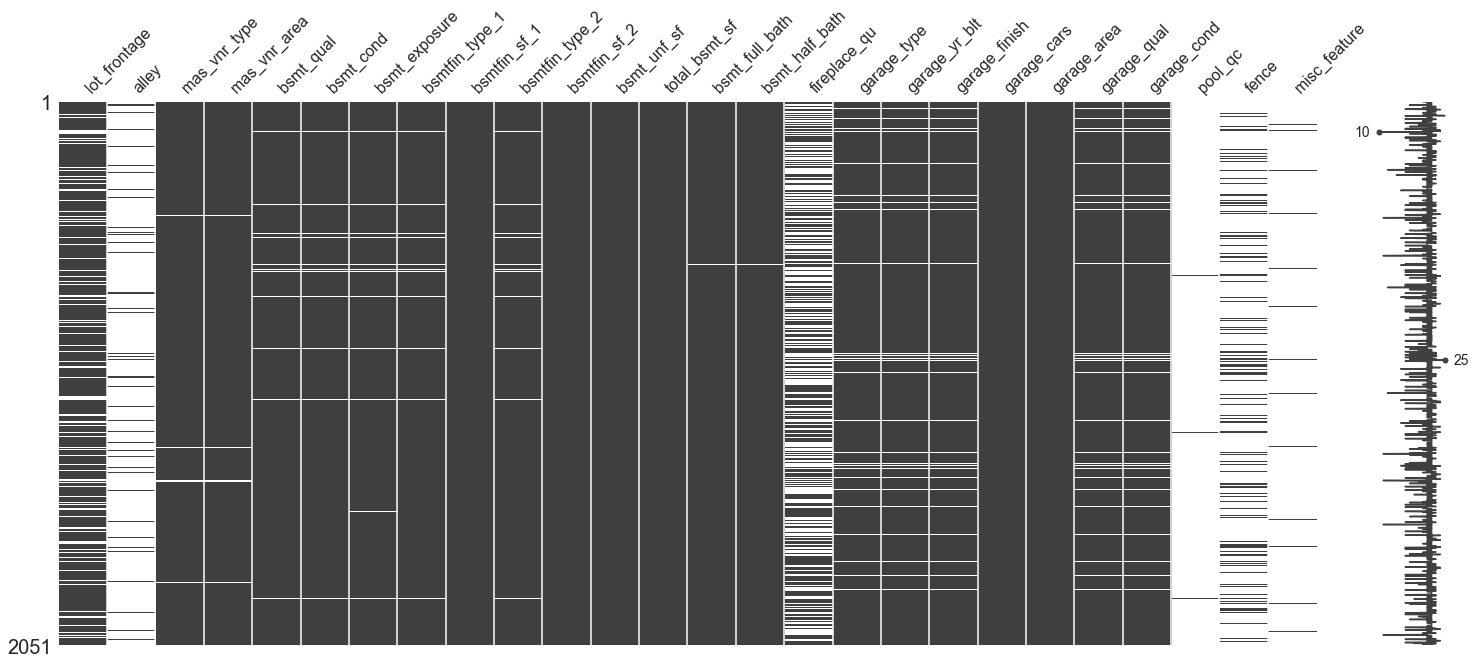

In [8]:
# msno is helpful to check if the null values are related
msno.matrix(df[null_value_df]);

In [9]:
# Dropping 'Pool_qc' and 'misc_feature' since so many null values. 
df['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [10]:
df['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [11]:
df.drop(['pool_qc','misc_feature'], axis=1, inplace=True)

### Lot frontage

Examining the features with null values and making a call on how to input values

In [12]:
df['lot_frontage'].value_counts().sample(5)

95.0     11
75.0     68
137.0     1
93.0      9
120.0     8
Name: lot_frontage, dtype: int64

In [13]:
lot_frontage_nulls = df[df['lot_frontage'].isna()]
lot_frontage_nulls.sample(5)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1816  2114  906402070           60        RL           NaN     14364   Pave   
1918  2217  909279080           50        RL           NaN     11275   Pave   
876    559  532376070           20        RL           NaN      9316   Pave   
1610   937  909452050           80        RL           NaN     13607   Pave   
818   2147  907252190           20        RL           NaN     11354   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1816   NaN       IR1          Low    AllPub     Inside        Mod   
1918   NaN       IR1          HLS    AllPub     Corner        Mod   
876    NaN       IR1          Lvl    AllPub     Inside        Gtl   
1610   NaN       IR1          Lvl    AllPub     Inside        Gtl   
818    NaN       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1816      SawyerW        Norm        Norm      1Fam      2Story             7   
1918      Crawfor        Norm        Norm      1Fam      1.5Fin             6   
876        Sawyer        Norm        Norm      1Fam      1Story             5   
1610      Crawfor        Norm        Norm      1Fam        SLvl             6   
818       CollgCr        Norm        Norm      1Fam      1Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1816             5        1988            1989      Gable   CompShg   
1918             7        1932            1950      Gable   CompShg   
876              5        1965            1965      Gable   CompShg   
1610             6        1986            1986      Gable   CompShg   
818              5        2000            2000      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1816      Plywood      Plywood      BrkFace         128.0         Gd   
1918      MetalSd      MetalSd      BrkFace         480.0         TA   
876       HdBoard      Plywood         None           0.0         TA   
1610      VinylSd      VinylSd      BrkFace         242.0         TA   
818       VinylSd      VinylSd         None           0.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1816         TA     CBlock        Gd        TA            Gd            GLQ   
1918         TA     CBlock        TA        TA            Mn            Rec   
876          TA     CBlock        TA        TA            No            Rec   
1610         Gd     CBlock        TA        TA            No            ALQ   
818          TA      PConc        TA        TA            Gd            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1816        1065.0            Unf           0.0         92.0         1157.0   
1918         297.0            LwQ         557.0          0.0          854.0   
876          544.0            Unf           0.0        480.0         1024.0   
1610         454.0            Unf           0.0        118.0          572.0   
818         1412.0            Unf           0.0        261.0         1673.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1816    GasA         Ex           Y      SBrkr        1180         882   
1918    GasA         TA           Y      SBrkr        1096         895   
876     GasA         Gd           Y      SBrkr        1020           0   
1610    GasA         Gd           Y      SBrkr        1182         800   
818     GasA         Ex           Y      SBrkr        1673           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1816                0         2062             1.0             0.0          2   
1918                0         1991             0.0             0.0          1   
876                 0         1020             0.0             0.0          2   
1610                0         1982             1.0  

In [14]:
# Group lots by configuration
grouped_lots = df.groupby(['lot_config']).agg({'lot_frontage' : 'mean'})
grouped_lots

lot_frontage
lot_config              
Corner         83.245552
CulDSac        55.228571
FR2            60.836735
FR3            87.000000
Inside         66.952780

In [15]:
#replace np.nan with average for lot_config of that type
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'Corner'), 'lot_frontage'] = 83.25
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'CulDSac'), 'lot_frontage'] = 54.734375        
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'FR2'), 'lot_frontage'] = 60.836735        
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'FR3'), 'lot_frontage'] = 87.000000        
df.loc[(df['lot_frontage'].isna()) & (df['lot_config'] == 'Inside'), 'lot_frontage'] = 66.759571

In [16]:
df['lot_frontage'].isna().sum()

0

### Alley

In [17]:
df['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [18]:
df['alley'].isnull().sum()

1911

In [19]:
df['alley'] = df['alley'].replace(np.nan,'NA')

In [20]:
df['alley'].isna().sum()

0

### Masonry veneer type and area

In [21]:
print(df['mas_vnr_type'].value_counts())
print(df['mas_vnr_area'].value_counts())
df[df['mas_vnr_type'].isna()].sample(5)

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
0.0      1216
120.0      11
176.0      10
200.0      10
210.0       9
         ... 
576.0       1
796.0       1
573.0       1
372.0       1
428.0       1
Name: mas_vnr_area, Length: 373, dtype: int64


id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
591   1841  533208040          120        FV         35.00      4274   Pave   
431   1455  907251090           60        RL         75.00      9473   Pave   
1815  2456  528429100           20        RL         49.00     15218   Pave   
1306  1752  528250010           80        RL         83.25     11950   Pave   
1699  2261  916384070           20        RL         68.00      8298   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
591   Pave       IR1          Lvl    AllPub     Inside        Gtl   
431     NA       Reg          Lvl    AllPub     Inside        Gtl   
1815    NA       IR1          Lvl    AllPub    CulDSac        Gtl   
1306    NA       IR1          Lvl    AllPub     Corner        Gtl   
1699    NA       IR1          HLS    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
591       Somerst        Norm        Norm    TwnhsE      1Story             7   
431       CollgCr        Norm        Norm      1Fam      2Story             8   
1815      Somerst        RRAn        Norm      1Fam      1Story             8   
1306      Gilbert        Norm        Norm      1Fam        SLvl             7   
1699       Timber        Norm        Norm      1Fam      1Story             8   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
591              5        2006            2007      Gable   CompShg   
431              5        2002            2002      Gable   CompShg   
1815             5        2006            2006      Gable   CompShg   
1306             5        2003            2003      Gable   CompShg   
1699             5        2006            2007        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
591       VinylSd      VinylSd          NaN           NaN         Gd   
431       VinylSd      VinylSd          NaN           NaN         Gd   
1815      VinylSd      VinylSd          NaN           NaN         Gd   
1306      VinylSd      VinylSd          NaN           NaN         Gd   
1699      VinylSd      VinylSd          NaN           NaN         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
591          TA      PConc        Gd        TA            No            GLQ   
431          TA      PConc        Gd        TA            No            GLQ   
1815         TA      PConc        Ex        Gd            No            GLQ   
1306         TA      PConc        Gd        TA            No            Unf   
1699         TA      PConc        Gd        TA            Av            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
591         1106.0            Unf           0.0        135.0         1241.0   
431          804.0            Unf           0.0        324.0         1128.0   
1815        1562.0            Unf           0.0        108.0         1670.0   
1306           0.0            Unf           0.0        384.0          384.0   
1699         583.0            Unf           0.0        963.0         1546.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
591     GasA         Ex           Y      SBrkr        1241           0   
431     GasA         Ex           Y      SBrkr        1128         903   
1815    GasA         Ex           Y      SBrkr        1670           0   
1306    GasA         Ex           Y      SBrkr         754         640   
1699    GasA         Ex           Y      SBrkr        1564           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
591                 0         1241             1.0             0.0          1   
431                 0         2031             1.0             0.0          2   
1815                0         1670             1.0             0.0          2   
1306                0         1394             0.0  

In [22]:
df['mas_vnr_type'] = df['mas_vnr_type'].replace(np.nan, 'None') #replace masonry np.nan with None
df['mas_vnr_area'] = df['mas_vnr_area'].replace(np.nan, 0) #replace masonry np.nan with 0


In [23]:
print(df['mas_vnr_type'].isna().sum())
print(df['mas_vnr_type'].isna().sum())

0
0


### Basement

It is said that it is uncommon in the US to include the basement square footage in the measure of a property’s size. In fact, Fannie Mae and ANSI guidelines forbid the counting of basement square footage in appraising a property’s living area, though one can imagine that it is still likely to exert some impact on property prices.

In [24]:
df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [25]:
df[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf','bsmt_full_bath', 'bsmt_half_bath']].isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [26]:
#these all receive an NA if no basement
basement_to_na = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
       'bsmtfin_type_2']

#these receive 0sqft if basement is NA
basement_to_zero = ['bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 'bsmt_full_bath',
       'bsmt_half_bath']

for i in basement_to_na:
    df[i] = df[i].replace(np.nan,'NA')

In [27]:
df[df['bsmtfin_sf_1'].isna()] #the missing records are for NA basement properties. Setting to sqft value to zero.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327    NA       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc        NA        NA            NA             NA   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN             NA           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area  fence  misc_val  mo_sold  yr_sold sale_type  \
1327             0          0  MnPrv         0        4     2008     ConLD   

      saleprice  
1327      79000

In [28]:
#set basement sqft to 0 IF basement is NA, else drop as incomplete basement data and only 1 null record for each    
for i in basement_to_zero:
    df[i] = df[i].replace(np.nan, 0)

In [29]:
df['bsmt_qual'].isna().sum()

0

### Fireplace

In [30]:
df['fireplace_qu'].isnull().sum()

1000

In [31]:
df['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [32]:
df['fireplaces'].unique()

array([0, 1, 2, 4, 3])

In [33]:
len(df[(df['fireplace_qu'].isna()) & (df['fireplaces'] < 1)])

1000

In [34]:
df['fireplace_qu'] = df['fireplace_qu'].replace(np.nan, 'NA')

In [35]:
df['fireplace_qu'].isna().sum()

0

### Garage

In [36]:
df[['garage_type','garage_finish','garage_qual','garage_cond']].isnull().sum()

garage_type      113
garage_finish    114
garage_qual      114
garage_cond      114
dtype: int64

In [37]:
garage_to_na = ['garage_type','garage_finish','garage_qual','garage_cond']

In [38]:
for i in garage_to_na:
    df[i] = df[i].replace(np.nan, 'NA')

In [39]:
df[['garage_yr_blt','garage_cars', 'garage_area']].isna().sum()

garage_yr_blt    114
garage_cars        1
garage_area        1
dtype: int64

In [40]:
df[(df['garage_yr_blt'].isna()) & (df['garage_type'] !='NA')]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1712  2237  910201180           70        RM          50.0      9060   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1712    NA       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1712       IDOTRR        Norm        Norm      1Fam      2Story             5   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1712             6        1923            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1712      Wd Sdng      Plywood         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1712         548.0            Unf           0.0        311.0          859.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712    GasA         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0           NA      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712            NA          NaN          NaN          NA          NA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area  fence  misc_val  mo_sold  yr_sold sale_type  \
1712             0          0  MnPrv         0        3     2007        WD   

      saleprice  
1712     150909

In [41]:
garage_to_0 = ['garage_yr_blt','garage_cars', 'garage_area']

In [42]:
for i in garage_to_0:
    df[i] = df[i].replace(np.nan, 0) 

In [43]:
df[['garage_type','garage_finish','garage_qual','garage_cond','garage_yr_blt','garage_cars', 'garage_area']].isnull().sum()

garage_type      0
garage_finish    0
garage_qual      0
garage_cond      0
garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

### Fence

In [44]:
df['fence'] = df['fence'].replace(np.nan, 'NA') 

In [45]:
df['fence'].isnull().sum()

0

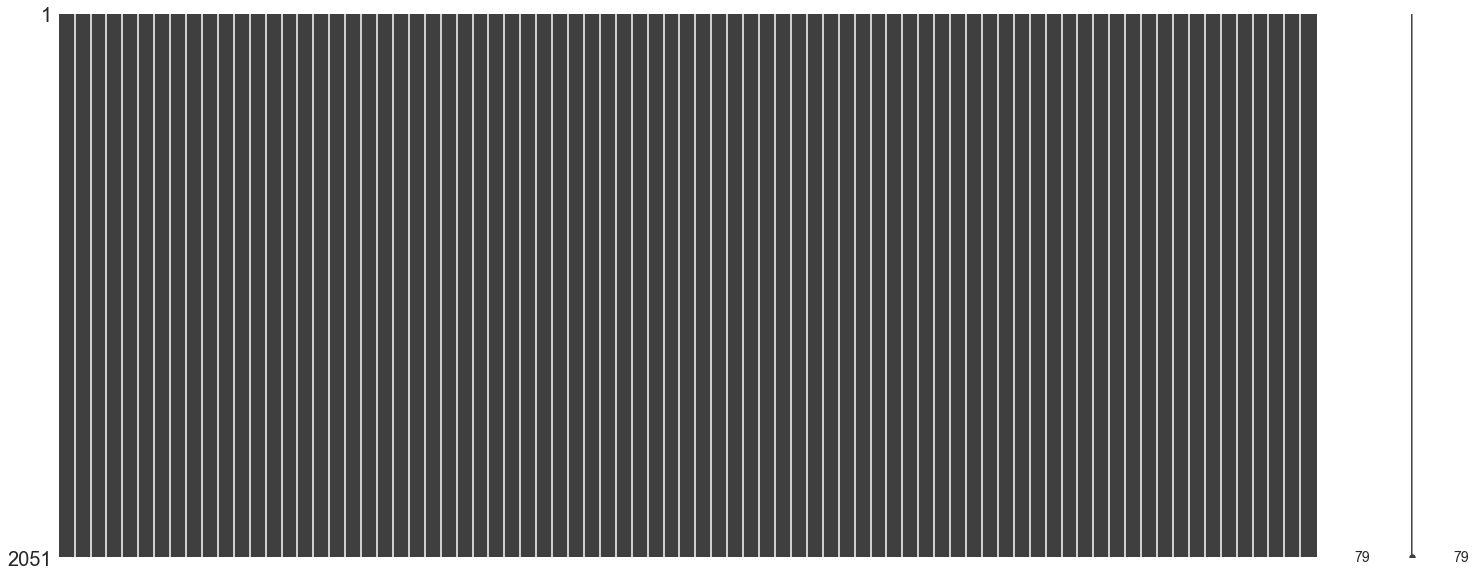

In [46]:
# All null values have been dealt with
msno.matrix(df);

### Grouping columns
The grouping is to facilitate cleaning and examining relationship between the grouped features.
Grouping into Indexing, Ordinal, Nominal, Numeric Categories and Numeric

In [47]:
df_indexing = df[['saleprice','id', 'pid']]

In [48]:
df_indexing.head()

saleprice   id        pid
0     130500  109  533352170
1     220000  544  531379050
2     109000  153  535304180
3     174000  318  916386060
4     138500  255  906425045

#### Ordinal data

In [49]:
df_ordinal = df[['saleprice','lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','fence']]

In [50]:
df_ordinal.head()

saleprice lot_shape utilities land_slope  overall_qual  overall_cond  \
0     130500       IR1    AllPub        Gtl             6             8   
1     220000       IR1    AllPub        Gtl             7             5   
2     109000       Reg    AllPub        Gtl             5             7   
3     174000       Reg    AllPub        Gtl             5             5   
4     138500       IR1    AllPub        Gtl             6             8   

  exter_qual exter_cond bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
0         Gd         TA        TA        TA            No            GLQ   
1         Gd         TA        Gd        TA            No            GLQ   
2         TA         Gd        TA        TA            No            GLQ   
3         TA         TA        Gd        TA            No            Unf   
4         TA         TA        Fa        Gd            No            Unf   

  bsmtfin_type_2 heating_qc electrical kitchen_qual functional fireplace_qu  \
0            Unf         Ex      SBrkr           Gd        Typ           NA   
1            Unf         Ex      SBrkr           Gd        Typ           TA   
2            Unf         TA      SBrkr           Gd        Typ           NA   
3            Unf         Gd      SBrkr           TA        Typ           NA   
4            Unf         TA      SBrkr           TA        Typ           NA   

  garage_finish garage_qual garage_cond paved_drive fence  
0           RFn          TA          TA           Y    NA  
1           RFn          TA          TA           Y    NA  
2           Unf          TA          TA           Y    NA  
3           Fin          TA          TA           Y    NA  
4           Unf          TA          TA           N    NA

In [51]:
df_ordinal.dtypes

saleprice          int64
lot_shape         object
utilities         object
land_slope        object
overall_qual       int64
overall_cond       int64
exter_qual        object
exter_cond        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating_qc        object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
fence             object
dtype: object

#### Nominal data

In [52]:
df_nominal = df[['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1',
       'condition_2','bldg_type','house_style','roof_style','roof_matl', 'exterior_1st', 'exterior_2nd','mas_vnr_type',
        'foundation','heating','central_air','garage_type','sale_type']]

In [53]:
df_nominal.head()

ms_subclass ms_zoning street alley land_contour lot_config neighborhood  \
0           60        RL   Pave    NA          Lvl    CulDSac       Sawyer   
1           60        RL   Pave    NA          Lvl    CulDSac      SawyerW   
2           20        RL   Pave    NA          Lvl     Inside        Names   
3           60        RL   Pave    NA          Lvl     Inside       Timber   
4           50        RL   Pave    NA          Lvl     Inside      SawyerW   

  condition_1 condition_2 bldg_type house_style roof_style roof_matl  \
0        RRAe        Norm      1Fam      2Story      Gable   CompShg   
1        Norm        Norm      1Fam      2Story      Gable   CompShg   
2        Norm        Norm      1Fam      1Story      Gable   CompShg   
3        Norm        Norm      1Fam      2Story      Gable   CompShg   
4        Norm        Norm      1Fam      1.5Fin      Gable   CompShg   

  exterior_1st exterior_2nd mas_vnr_type foundation heating central_air  \
0      HdBoard      Plywood      BrkFace     CBlock    GasA           Y   
1      VinylSd      VinylSd      BrkFace      PConc    GasA           Y   
2      VinylSd      VinylSd         None     CBlock    GasA           Y   
3      VinylSd      VinylSd         None      PConc    GasA           Y   
4      Wd Sdng      Plywood         None      PConc    GasA           Y   

  garage_type sale_type  
0      Attchd        WD  
1      Attchd        WD  
2      Detchd        WD  
3     BuiltIn        WD  
4      Detchd        WD

In [54]:
df_nominal.dtypes

ms_subclass      int64
ms_zoning       object
street          object
alley           object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
central_air     object
garage_type     object
sale_type       object
dtype: object

#### Numeric Category

In [55]:
df_numeric_category = df[['saleprice','ms_subclass', 'ms_zoning', 'overall_qual',
       'overall_cond','mo_sold']]

In [56]:
df_numeric_category.head()

saleprice  ms_subclass ms_zoning  overall_qual  overall_cond  mo_sold
0     130500           60        RL             6             8        3
1     220000           60        RL             7             5        4
2     109000           20        RL             5             7        1
3     174000           60        RL             5             5        4
4     138500           50        RL             6             8        3

In [57]:
df_numeric_category.dtypes

saleprice        int64
ms_subclass      int64
ms_zoning       object
overall_qual     int64
overall_cond     int64
mo_sold          int64
dtype: object

#### Numeric

In [58]:
df_numeric = df[['saleprice','lot_frontage', 'lot_area','year_built', 'year_remod/add','mas_vnr_area','bsmtfin_sf_2', 'bsmt_unf_sf', 
                'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars', 'garage_area','wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area','misc_val','yr_sold'                              
               ]]

In [59]:
df_numeric.head()

saleprice  lot_frontage  lot_area  year_built  year_remod/add  \
0     130500     54.734375     13517        1976            2005   
1     220000     43.000000     11492        1996            1997   
2     109000     68.000000      7922        1953            2007   
3     174000     73.000000      9802        2006            2007   
4     138500     82.000000     14235        1900            1993   

   mas_vnr_area  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  1st_flr_sf  \
0         289.0           0.0        192.0          725.0         725   
1         132.0           0.0        276.0          913.0         913   
2           0.0           0.0        326.0         1057.0        1057   
3           0.0           0.0        384.0          384.0         744   
4           0.0           0.0        676.0          676.0         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

   fireplaces  garage_yr_blt  garage_cars  garage_area  wood_deck_sf  \
0           0         1976.0          2.0        475.0             0   
1           1         1997.0          2.0        559.0             0   
2           0         1953.0          1.0        246.0             0   
3           0         2007.0          2.0        400.0           100   
4           0         1957.0          2.0        484.0             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   misc_val  yr_sold  
0         0     2010  
1         0     2009  
2         0     2010  
3         0     2010  
4         0     2010

In [60]:
df_numeric.dtypes

saleprice            int64
lot_frontage       float64
lot_area             int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_yr_blt      float64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
yr_sold              int64
dtype: object

# Exploratory Data Analysis
Getting some preliminary info and EDA about dependent variable Sales Price

In [61]:
y = df['saleprice']

In [62]:
y.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

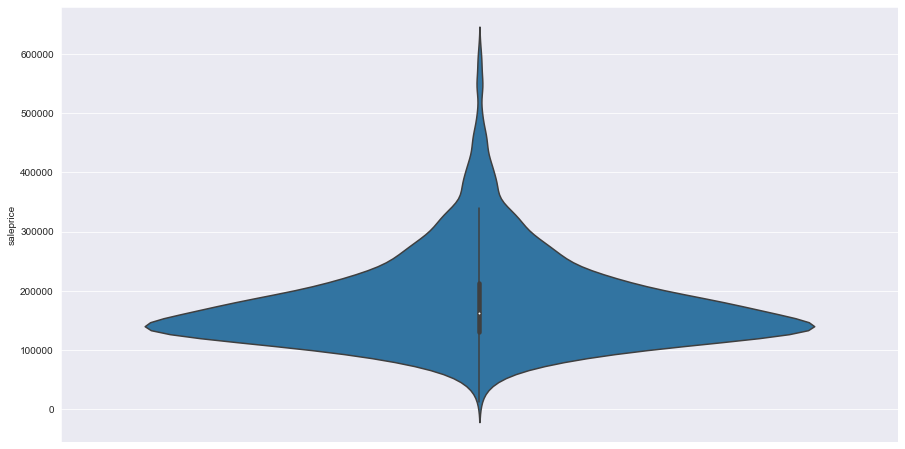

In [63]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(y='saleprice', data=df);

### Preparing data and looking at relationship between features and sale price

#### Ordinal data.
Will want to convert these to ordinal lists and view their relationship to Sales Price with a linear regression plots

In [64]:
#columns I want to replace values in
df_ordinal_str_columns = df[['lot_shape','utilities','land_slope','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','fence']]


#dictionary of values I want to replace
dict_ordinal = {
    #overall_qual, overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,heatingqc,kitchenqual
    #firplacequ,garage_qual,garage_cond,fence
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1   
}

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [65]:
df[['lot_shape','utilities','land_slope','exter_qual', 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
        'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','fence']].head(3)

lot_shape  utilities  land_slope  exter_qual  exter_cond  bsmt_qual  \
0          3          4           3           4           3          3   
1          3          4           3           4           3          4   
2          4          4           3           3           4          3   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  \
0          3              1               6               1           5   
1          3              1               6               1           5   
2          3              1               6               1           3   

   electrical  kitchen_qual  functional  fireplace_qu  garage_finish  \
0           1             4           1             0              2   
1           1             4           1             3              2   
2           1             4           1             0              1   

   garage_qual  garage_cond  paved_drive  fence  
0            3            3            2      0  
1            3            3            2      0  
2            3            3            2      0

In [66]:
#checking to see if all dtypes now numeric
df[['lot_shape','utilities','land_slope','exter_qual', 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
        'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','fence']].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
fence             int64
dtype: object

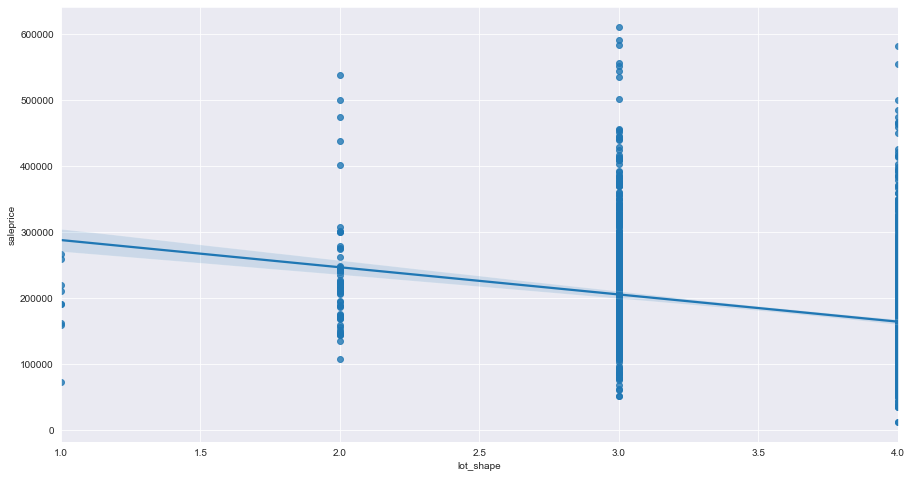

In [67]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['lot_shape'],y=df['saleprice']); 

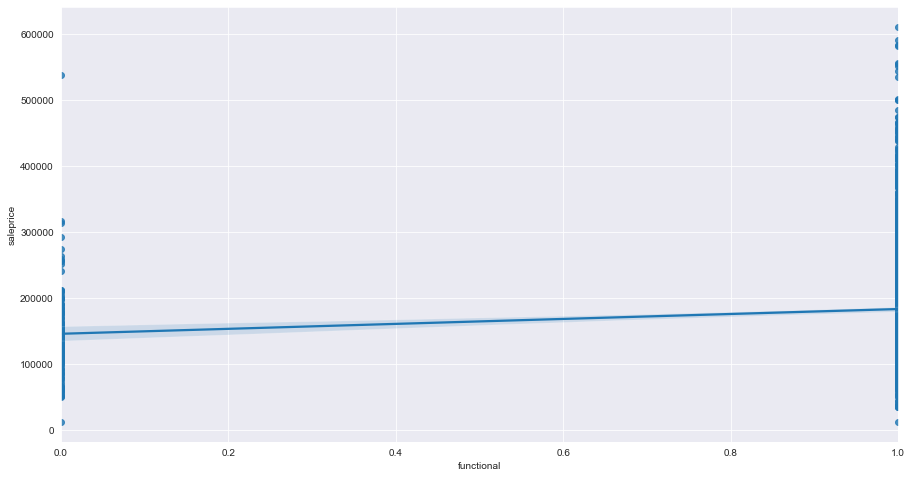

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['functional'],y=df['saleprice']);

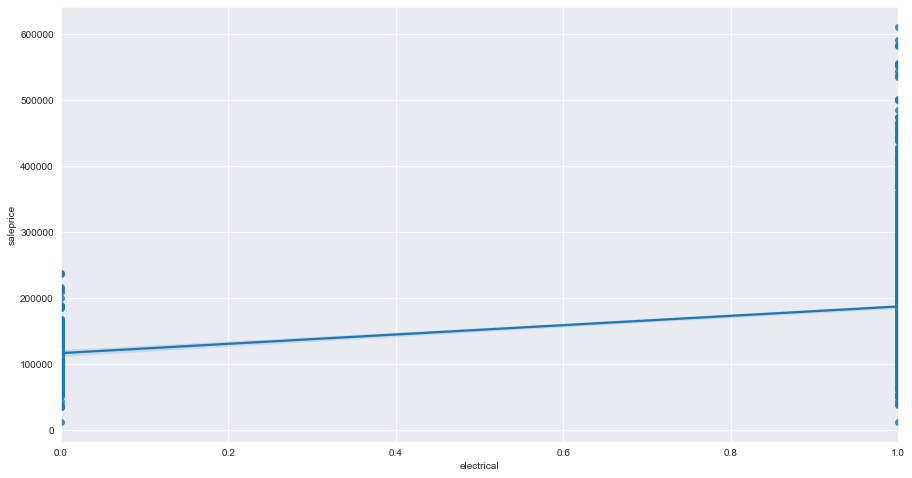

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['electrical'],y=df['saleprice']); 

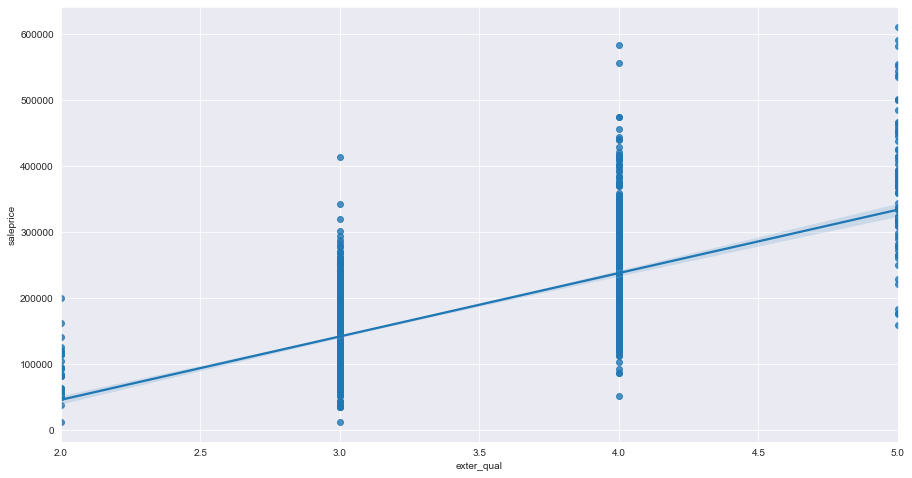

In [70]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['exter_qual'],y=df['saleprice']); 

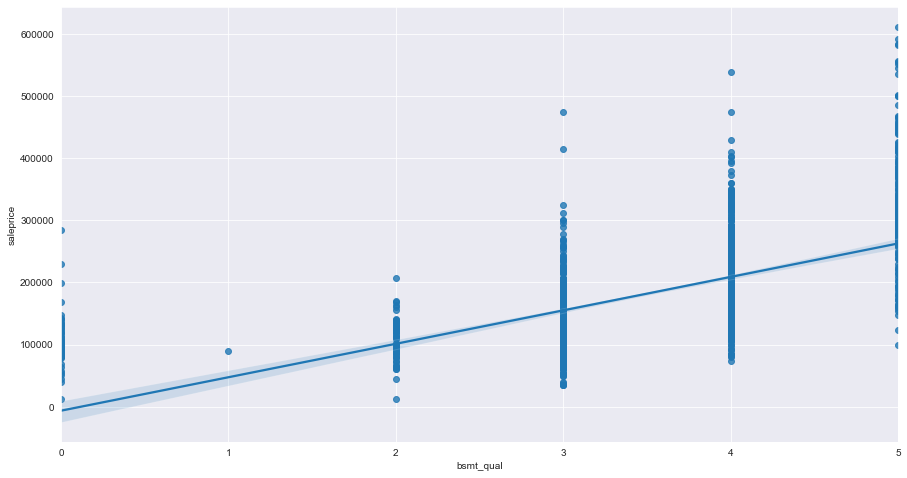

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['bsmt_qual'],y=df['saleprice']); 

In [72]:
df['basement_overall'] = df['bsmt_qual'] * df['bsmt_exposure'] #an overall score of basement quality in ceiling height and access to outside

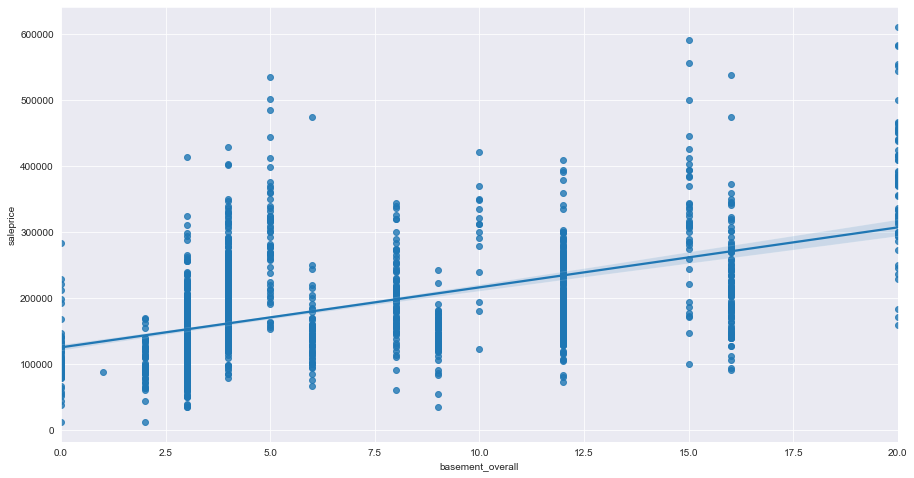

In [73]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['basement_overall'],y=df['saleprice']); 

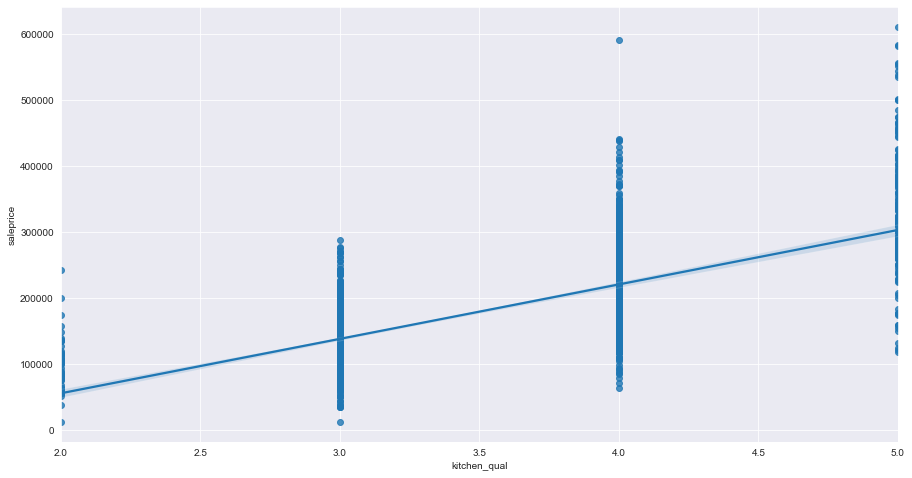

In [74]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['kitchen_qual'],y=df['saleprice']); 

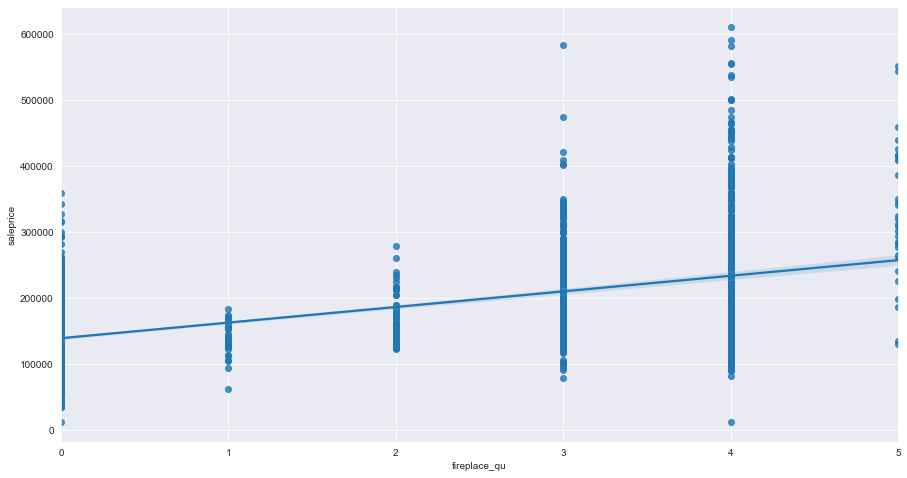

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['fireplace_qu'],y=df['saleprice']); 

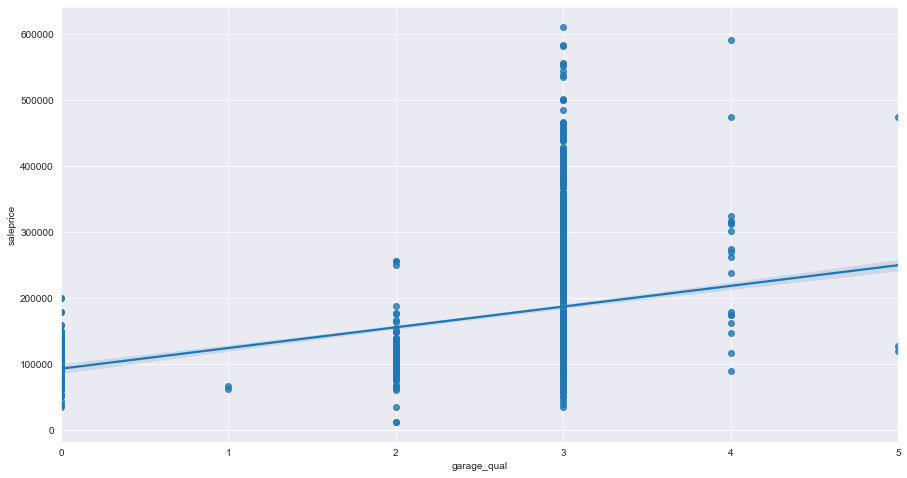

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['garage_qual'],y=df['saleprice']);

### Nominal data
Examining if some of the nominal data works better as ordinal data.

Will want to convert these to ordinal lists and view their relationship to Sales Price with a linear regression plots, jointplots, boxplots and a pretty cool geopy/foliage heatmap of Sale Price mapped to the Ames itself with zoom in/out function.

In [77]:
df_nominal.columns

Index(['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour',
       'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type'],
      dtype='object')

In [78]:
df.groupby('ms_zoning')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
ms_zoning                      
A           47300.000000      2
I           57625.000000      1
C           78010.894737     19
RM         129119.142405    316
RH         148859.571429     14
RL         191235.164581   1598
FV         218618.316832    101

In [79]:
df['is_residential'] = df['ms_zoning'] # a dummy variable for if a house is residential or other (ag, industrial, corp)
df_ordinal_str_columns = df[['is_residential']]

dict_ordinal = {
    'A':0,
    'I':0,
    'C':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [80]:
df.groupby('street')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
street                      
Grvl     86901.428571      7
Pave    181793.565558   2044

In [81]:
df.groupby('alley')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
alley                      
Grvl   120835.635294     85
Pave   174534.709091     55
NA     184366.258503   1911

In [82]:
df['not_grvl_alley'] = df['alley'] # a dummy variable for no alley or paved alley
df_ordinal_str_columns = df[['not_grvl_alley']]

dict_ordinal = {
    'Grvl':0,
    'Pave':1,
    'NA':1   
}
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [83]:
df.groupby('land_contour')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
land_contour                      
Bnk           142868.775000     80
Lvl           178998.564840   1843
Low           199313.116279     43
HLS           262353.376471     85

In [84]:
# ordering based on interpercentile sale price
df['land_contour_order'] = df['land_contour'] 
df_ordinal_str_columns = df[['land_contour_order']]

dict_ordinal = {
    'Bnk':1,
    'Lvl':1,
    'Low':2,
    'HLS':3
}
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

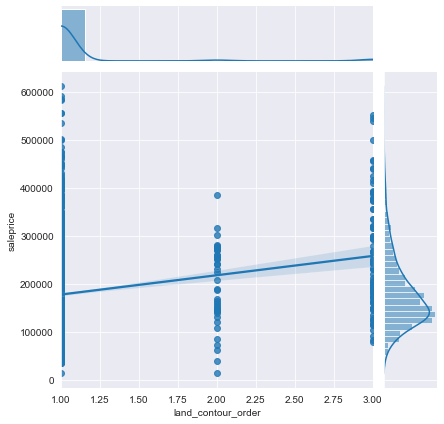

In [85]:
#this has a linear r-ship
sns.jointplot(x=df['land_contour_order'],y=df['saleprice'],kind="reg");

In [86]:
df.groupby('lot_config')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
lot_config                      
FR2         174703.600000     60
Inside      177537.014637   1503
Corner      180629.591954    348
FR3         198600.000000      9
CulDSac     230744.358779    131

In [87]:
location_price = df.groupby('neighborhood')['saleprice'].mean().sort_values()
location_price

neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
Names      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64

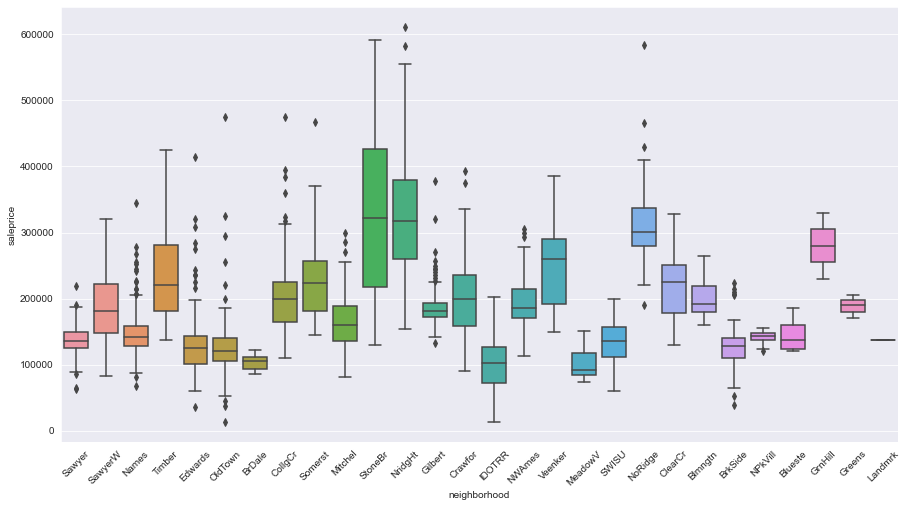

In [88]:
fig, ax = plt.subplots(figsize=(15,8))
ax.tick_params(axis='x', rotation=45)
sns.boxplot(x='neighborhood', y='saleprice', data=df);

# Heatmap of Sales Price on actual Ames map

I've turned the following cells into RAW and include a screencap of the heatmap if you don't wish to install these.

https://geopy.readthedocs.io/en/stable/ 

pip install geopy

https://pypi.org/project/folium/ 

pip install folium

restart kernel after installing

from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import folium
from folium.plugins import HeatMap

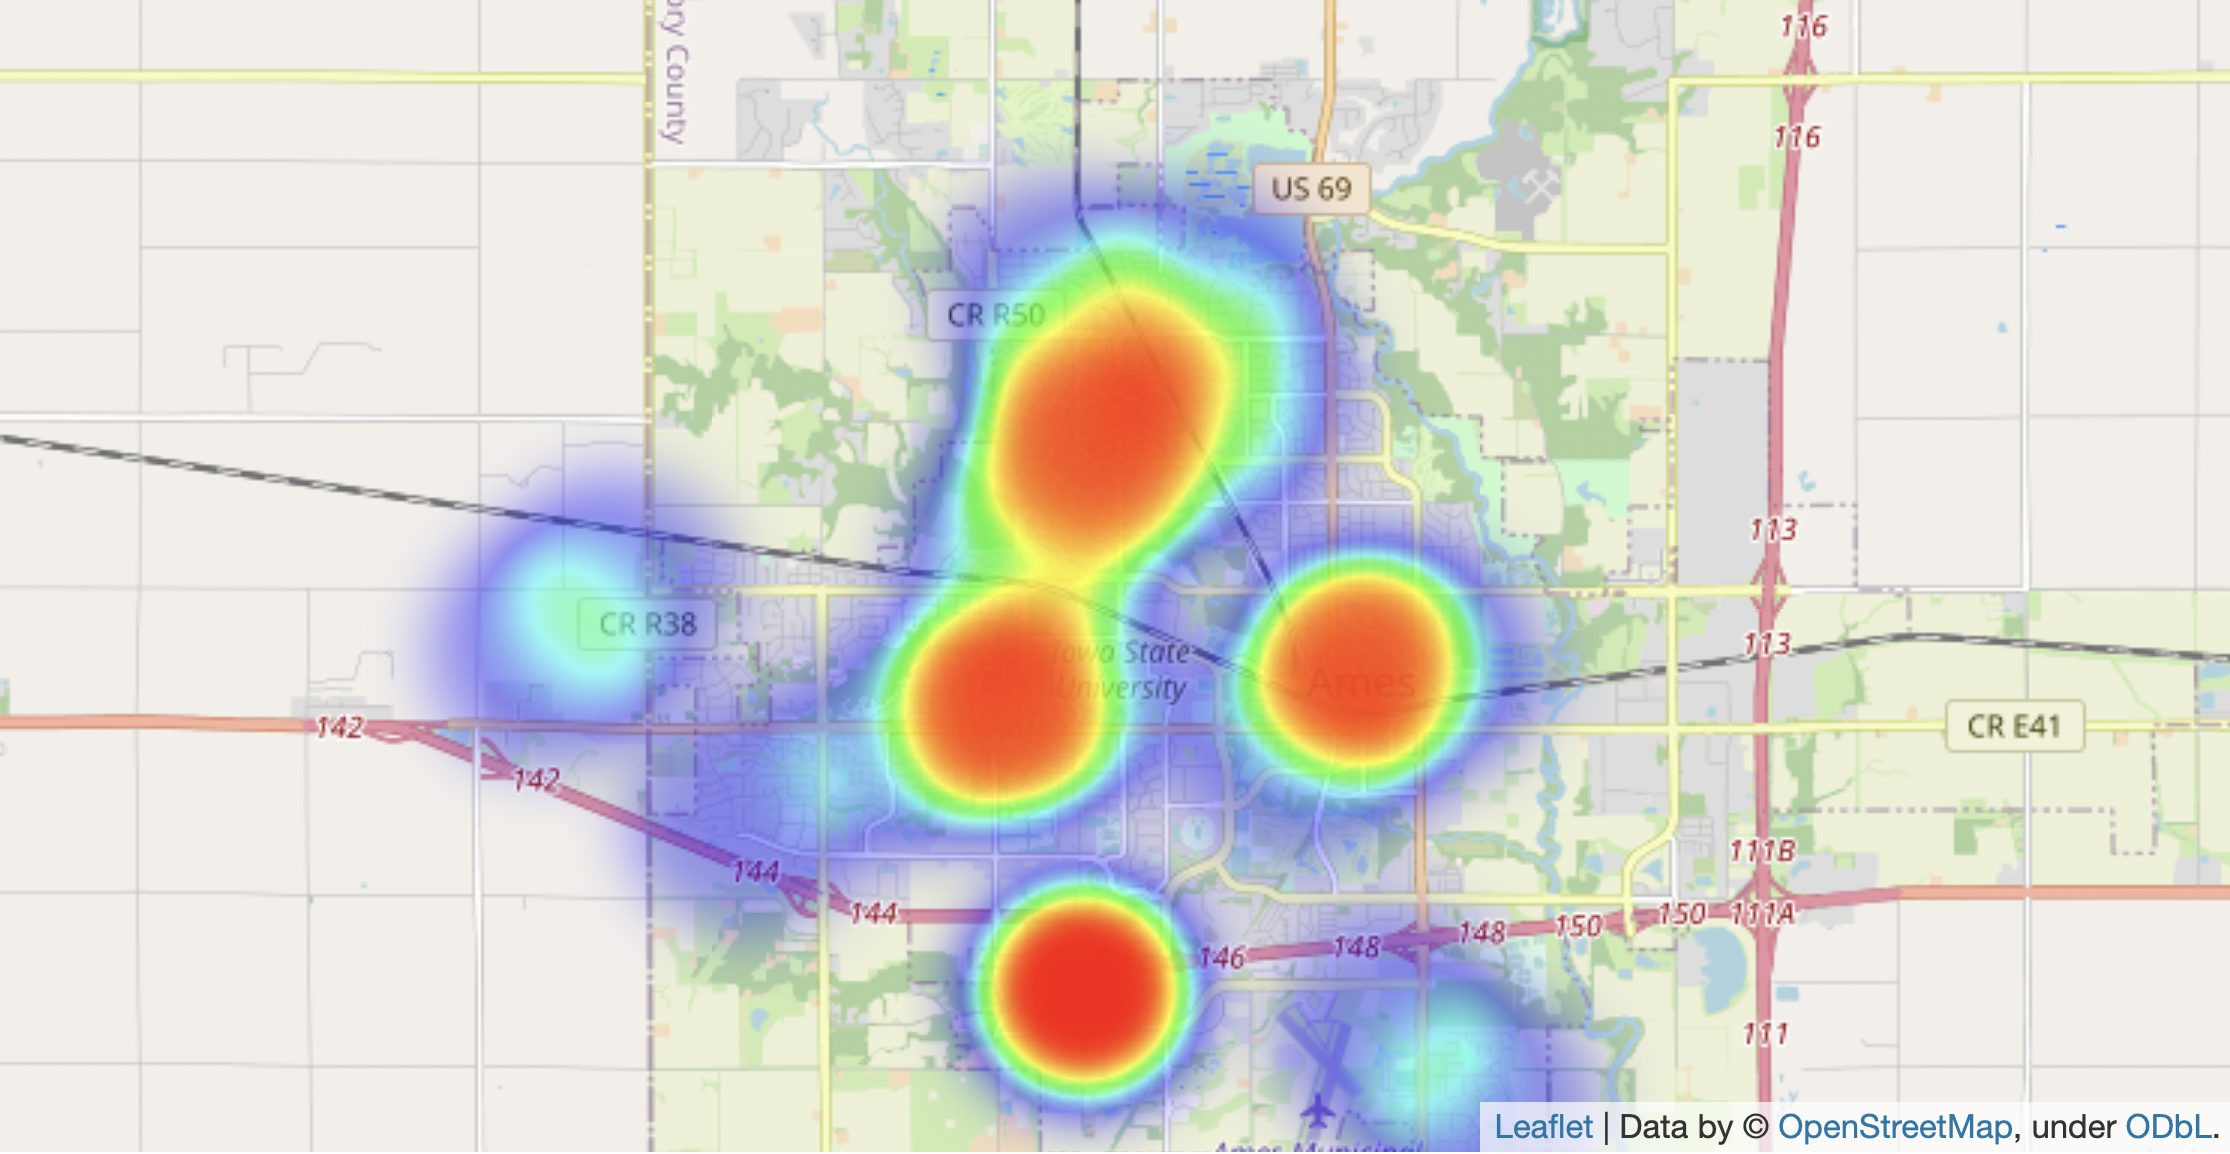

In [89]:
# Grouping neighborhood based on interquartile sale prices

df['neighborhood_order'] = df['neighborhood']
df_ordinal_str_columns = df[['neighborhood_order']]

dict_ordinal = {
    'MeadowV': 1,
    'IDOTRR' : 1,
    'BrDale' : 1,
    'OldTown': 1,
    'BrkSide': 1,
    'Edwards': 2,
    'SWISU': 2,
    'Landmrk':2,
    'Sawyer':2,
    'NPkVill':2,
    'Blueste':2,
    'Names':2,
    'Mitchel':3,
    'SawyerW':3,
    'Greens':3,
    'Gilbert':3,
    'NWAmes':3,
    'Blmngtn':3,
    'CollgCr':3,
    'Crawfor':3,
    'ClearCr':4,
    'Somerst':4,
    'Timber':4,
    'Veenker':4,
    'GrnHill':4,
    'StoneBr':4,
    'NoRidge':4,
    'NridgHt':4,
        }

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [90]:
df.groupby('neighborhood_order')['saleprice'].agg(['mean','count'])

mean  count
neighborhood_order                      
1                   118004.222222    351
2                   140037.653226    620
3                   192915.132716    648
4                   275329.918981    432

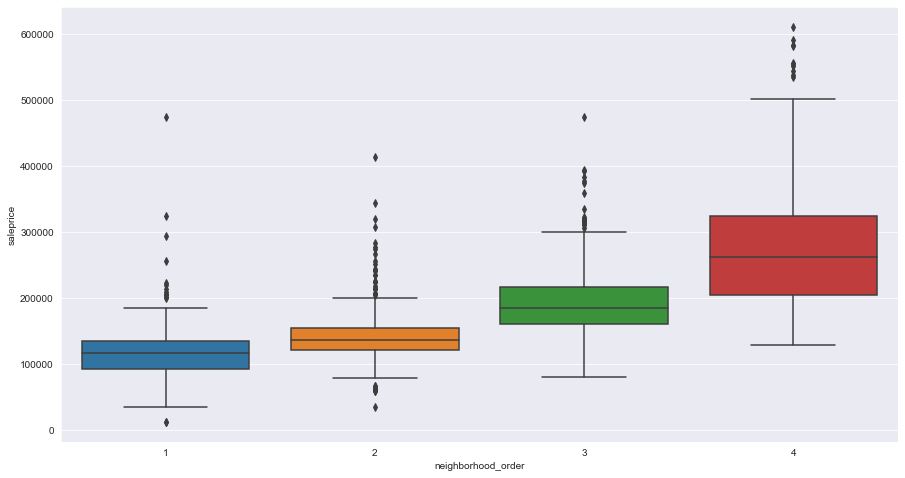

In [91]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='neighborhood_order', y='saleprice', data=df);

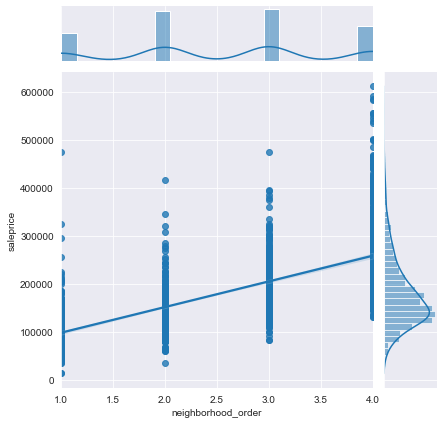

In [92]:
#There is a linear relationship between ordered neighborhood by price and saleprice. Also aprox. equal distribution items in each bin. This feature is a valuable one in the model.
sns.jointplot(x=df['neighborhood_order'],y=df['saleprice'],kind="reg");

In [93]:
df.groupby('condition_1')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #location matters!

mean  count
condition_1                      
Artery       128765.000000     70
RRNe         129616.666667      3
RRAe         139685.714286     21
Feedr        143223.605505    109
RRAn         172604.777778     36
Norm         185007.310130   1767
RRNn         198208.333333      6
PosA         254733.333333     12
PosN         254794.296296     27

In [94]:
#2 if by positive feature, 1 if normal, 0 if negative feature. 
df['positive_condition1'] = df['condition_1']
df['positive_condition2'] = df['condition_2']
df_ordinal_str_columns = df[['positive_condition2', 'positive_condition1']]


dict_ordinal = {
   'Artery':0,
    'RRNe':0,
    'RRAe':0,
    'Feedr':0,
    'RRAn':0,
    'Norm':1,
    'RRNn':0,
    'PosN':2,
    'PosA':2,
        }

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [95]:
df['local_conditions'] = df['positive_condition1']+df['positive_condition2'] #residential and green belt

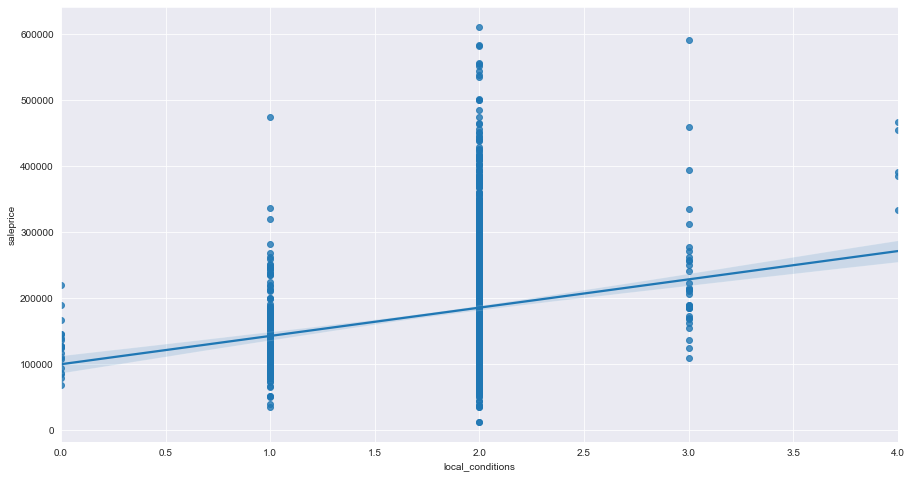

In [96]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['local_conditions'],y=df['saleprice']); 

In [97]:
df.groupby('bldg_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
bldg_type                      
2FmCon     123179.891304     46
TwnhsI     133100.000000     69
Duplx      139296.333333     75
1Fam       185275.685882   1700
TwnhsE     198312.372671    161

In [98]:
#dummy building type
df = pd.get_dummies(data = df, columns=['bldg_type'], drop_first=True)

In [99]:
df.groupby('house_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
house_style                      
1.5Unf       112466.666667     12
1.5Fin       136480.091743    218
SFoyer       149343.920000     50
SLvl         166248.989362     94
1Story       179809.194523   1059
2.5Unf       191785.714286     14
2Story       206408.963211    598
2.5Fin       243666.666667      6

In [100]:
# bin before dummy. 
df['house_style_condensed'] = df['house_style'] 
df_ordinal_str_columns = df[['house_style_condensed']]

dict_ordinal = {
    '1.5Unf':1.5,
    '1.5Fin':1.5,
    'SFoyer':1.5,
    'SLvl':1,
    '1Story':1,
     '2.5Unf':2,
    '2Story':2,
    '2.5Fin':2    
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [101]:
#dummy house style
df = pd.get_dummies(data = df, columns=['house_style_condensed'], drop_first=True)

In [102]:
df.groupby('roof_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #too many at gabel, will leave alone for now

mean  count
roof_style                      
Gambrel     138208.333333     12
Mansard     152642.857143      7
Gable       171264.253243   1619
Flat        191613.076923     13
Shed        208666.666667      3
Hip         224366.654912    397

In [103]:
# dummy for hip/nicer roof styles
df['is_hip_roof'] = df['roof_style'] 
df_ordinal_str_columns = df[['is_hip_roof']]

dict_ordinal = {
    'Gambrel':0,
    'Mansard':0,
    'Gable':0,
    'Flat':1,
    'Shed':1,
     'Hip':1,   
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [104]:
df.groupby('roof_matl')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') # too uniform, will leave alone for now

mean  count
roof_matl                      
ClyTile    160000.000000      1
CompShg    180849.197037   2025
Tar&Grv    187948.933333     15
Membran    241500.000000      1
WdShake    264250.000000      4
WdShngl    339400.000000      5

In [105]:
df.groupby('exterior_1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #material matters!

mean  count
exterior_1st                      
AsphShn        82375.000000      1
CBlock         93250.000000      2
AsbShng       103183.333333     33
BrkComm       131000.000000      3
Stucco        139712.962963     27
Wd Sdng       142940.887681    276
MetalSd       154402.048338    331
WdShing       155616.822222     45
HdBoard       159582.473333    300
Plywood       170511.453947    152
BrkFace       193055.093750     64
VinylSd       218174.082873    724
CemntBd       243429.088889     90
Stone         258500.000000      2
ImStucc       262000.000000      1

In [106]:
# 1 having the lower range of sale price - 5 the higher sale price
df['exterior_ordinal1'] = df['exterior_1st']
df['exterior_ordinal2'] = df['exterior_2nd']
df_ordinal_str_columns = df[['exterior_ordinal2', 'exterior_ordinal1']]

dict_ordinal = {
     'AsphShn':1,
    'CBlock':1,
    'AsbShng':1,
    'Brk Cmn':2,
    'BrkComm':2,
     'Stucco':2,
    'PreCast':2,
    'Other':3,
    'Wd Shng':3,
    'Wd Sdng':3,
    'MetalSd':3,
    'WdShing':3,
    'HdBoard':3,      
    'Plywood':4,
    'BrkFace':5,       
    'VinylSd':5,
    'CmentBd':5,
    'CemntBd':5,
    'Stone':5,    
    'ImStucc':5,        
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [107]:
df['external_feature'] = df['exterior_ordinal1'] + df['exterior_ordinal2']

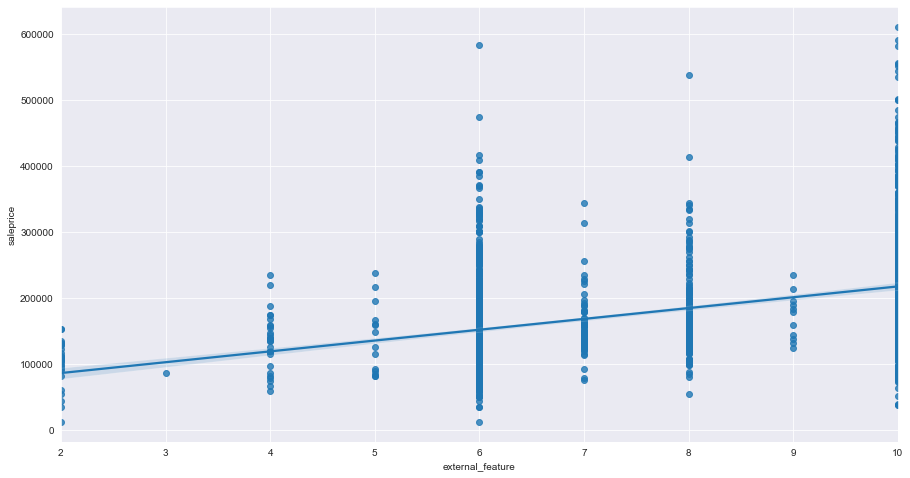

In [108]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['external_feature'],y=df['saleprice']); 

In [109]:
df.groupby('mas_vnr_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
mas_vnr_type                      
BrkCmn        144515.692308     13
None          155120.870161   1240
BrkFace       212161.436508    630
Stone         263714.702381    168

In [110]:
df['stone_brkface'] = df['mas_vnr_type'] # a dummy variable for if stone or brickface
df_ordinal_str_columns = df[['stone_brkface']]

dict_ordinal = {
    'BrkCmn':0,
    'None':0,
    'BrkCmn':1,
    'Stone':1
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [111]:
df.groupby('foundation')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
foundation                      
Slab        108810.676471     34
BrkTil      129050.190045    221
Stone       143235.200000      5
CBlock      148415.530707    863
Wood        173750.000000      2
PConc       227676.483801    926

In [112]:
# 1 having the lower range of sale price - 3 the higher sale price
df['foundation_order'] = df['foundation']
df_ordinal_str_columns = df[['foundation_order']]

dict_ordinal = {
    'Slab':1,
    'BrkTil':1,
    'Stone':2,
    'CBlock':2,
    'Wood':2,
    'PConc':3
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [113]:
df.groupby('heating')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
heating                     
Grav      65180.00000      5
Wall      77150.00000      6
OthW     125750.00000      2
GasW     151275.00000     20
GasA     182422.47671   2018

In [114]:
df['steam_heating'] = df['heating'] # a dummy variable for if steam heating or not
df_ordinal_str_columns = df[['steam_heating']]

dict_ordinal = {
    'Grav':0,
    'Wall':0,
    'OthW':1,
    'GasW':1,
    'GasA':1
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

In [115]:
df.groupby('central_air')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
central_air                      
N            100575.078014    141
Y            187441.503665   1910

In [116]:
df.groupby('garage_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
garage_type                      
CarPort      103823.545455     11
NA           105669.150442    113
Detchd       132132.947761    536
Basment      143242.333333     27
2Types       157184.210526     19
Attchd       205040.195383   1213
BuiltIn      247883.522727    132

In [117]:
# 1 having the lower range of sale price - 3 the higher sale price
df['garage_type_order'] = df['garage_type'] 
df_ordinal_str_columns = df[['garage_type_order']]

dict_ordinal = {
    'CarPort':1,
    'NA':1,
    'Detchd':2,
    'Basment':2,
    '2Types':2,
    'Attchd':3,
    'BuiltIn':3
        }
#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

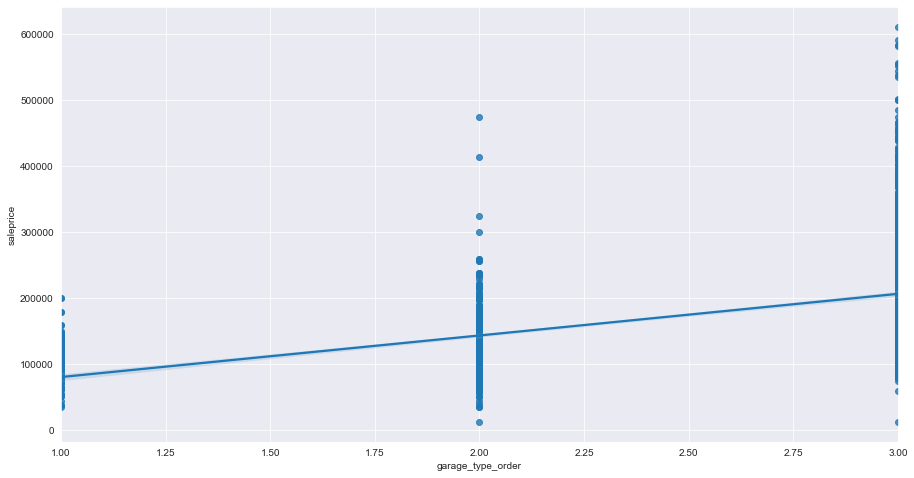

In [118]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['garage_type_order'],y=df['saleprice']); 

In [119]:
df.groupby('sale_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
sale_type                      
ConLw      124600.000000      5
Oth        127497.750000      4
ConLD      129091.352941     17
COD        133574.523810     63
WD         174912.251544   1781
CWD        186635.000000     10
ConLI      207992.857143      7
Con        241807.500000      4
New        279021.056250    160

In [120]:
#Sale Type ordered by price
df['sale_type_order'] = df['sale_type']
df_ordinal_str_columns = df[['sale_type_order']]

dict_ordinal = {
   'ConLw':1,
    'Oth':1,
    'ConLD':1,
    'COD':1,
    'WD':2,
    'WD ':2,
    'CWD':3,
    'ConLI':3,
    'Con':3,
    'New':3
        }

#loop to get the job done
for i in df_ordinal_str_columns.columns:
    df.replace({i: dict_ordinal},inplace = True)

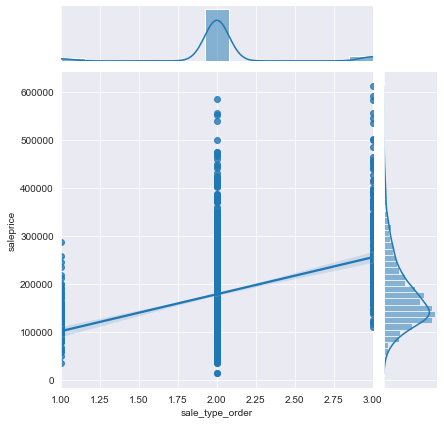

In [121]:
sns.jointplot(x=df['sale_type_order'],y=df['saleprice'],kind="reg");

### Numeric
Histogramsn and heatmap for a quick overview of features I want to explore or engineer.

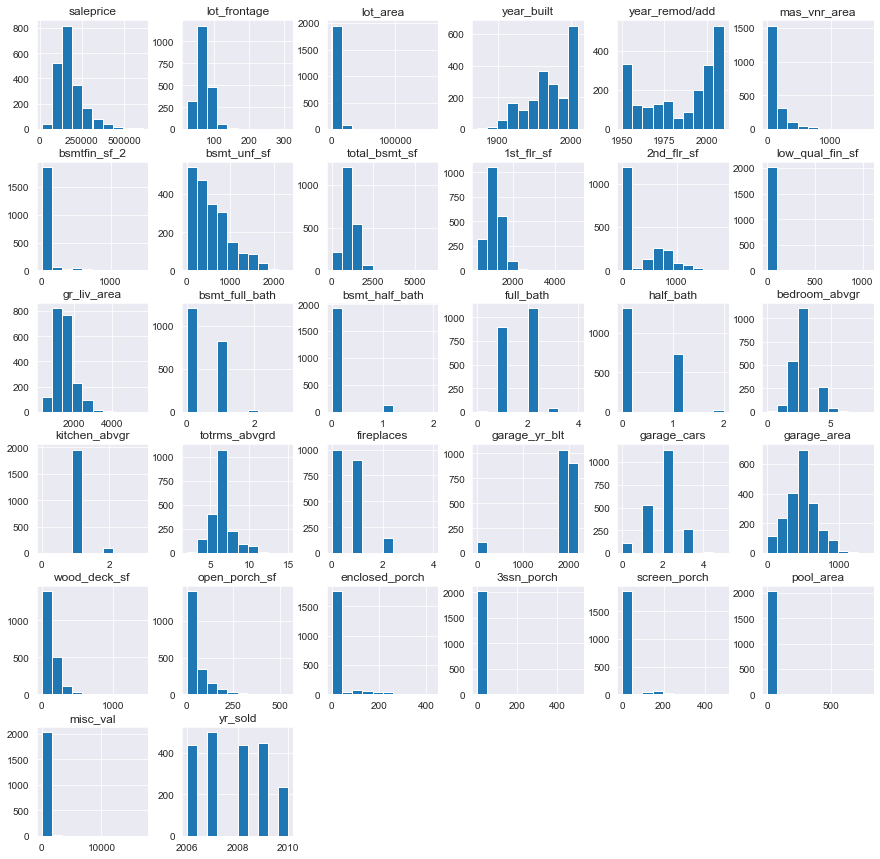

In [122]:
df_numeric.hist(figsize=(15, 15));

In [123]:
df_numeric.corr()

saleprice  lot_frontage  lot_area  year_built  \
saleprice         1.000000      0.319202  0.296566    0.571849   
lot_frontage      0.319202      1.000000  0.367740    0.096812   
lot_area          0.296566      0.367740  1.000000    0.036002   
year_built        0.571849      0.096812  0.036002    1.000000   
year_remod/add    0.550370      0.073297  0.050771    0.629116   
mas_vnr_area      0.503579      0.195513  0.167520    0.320780   
bsmtfin_sf_2      0.016432      0.033295  0.041799   -0.020906   
bsmt_unf_sf       0.190861      0.118819  0.041544    0.137114   
total_bsmt_sf     0.629303      0.325681  0.277478    0.410605   
1st_flr_sf        0.618486      0.420755  0.381593    0.323315   
2nd_flr_sf        0.248452      0.014609  0.029398    0.022313   
low_qual_fin_sf  -0.041594     -0.000094  0.001273   -0.159403   
gr_liv_area       0.697038      0.345733  0.327427    0.258838   
bsmt_full_bath    0.283332      0.099370  0.113283    0.215590   
bsmt_half_bath   -0.045290     -0.032461  0.029157   -0.031299   
full_bath         0.537969      0.133429  0.125601    0.480169   
half_bath         0.283001      0.035128  0.049995    0.283207   
bedroom_abvgr     0.137067      0.198496  0.139060   -0.042149   
kitchen_abvgr    -0.125444      0.016015 -0.013484   -0.127162   
totrms_abvgrd     0.504014      0.331490  0.238724    0.137783   
fireplaces        0.471093      0.220367  0.289467    0.168848   
garage_yr_blt     0.258645      0.084541  0.086080    0.274974   
garage_cars       0.647781      0.273033  0.214839    0.543313   
garage_area       0.649897      0.332395  0.263145    0.488023   
wood_deck_sf      0.326490      0.098327  0.155623    0.216339   
open_porch_sf     0.333476      0.170704  0.140864    0.207798   
enclosed_porch   -0.135656     -0.000048  0.014139   -0.380082   
3ssn_porch        0.048732      0.023244  0.019553    0.016104   
screen_porch      0.134581      0.071642  0.067714   -0.037866   
pool_area         0.023106      0.133533  0.115102    0.003728   
misc_val         -0.007375      0.045076  0.093922    0.000626   
yr_sold          -0.015203      0.006770 -0.029454   -0.003559   

                 year_remod/add  mas_vnr_area  bsmtfin_sf_2  bsmt_unf_sf  \
saleprice              0.550370      0.503579      0.016432     0.190861   
lot_frontage           0.073297      0.195513      0.033295     0.118819   
lot_area               0.050771      0.167520      0.041799     0.041544   
year_built             0.629116      0.320780     -0.020906     0.137114   
year_remod/add         1.000000      0.204234     -0.056894     0.160910   
mas_vnr_area           0.204234      1.000000     -0.015346     0.083393   
bsmtfin_sf_2          -0.056894     -0.015346      1.000000    -0.231053   
bsmt_unf_sf            0.160910      0.083393     -0.231053     1.000000   
total_bsmt_sf          0.309795      0.403618      0.086760     0.419969   
1st_flr_sf             0.244190      0.386482      0.095758     0.302567   
2nd_flr_sf             0.159605      0.098692     -0.087380    -0.012439   
low_qual_fin_sf       -0.066577     -0.061104     -0.002749     0.059618   
gr_liv_area            0.322407      0.383875      0.001254     0.235192   
bsmt_full_bath         0.153771      0.147129      0.157182    -0.401613   
bsmt_half_bath        -0.037763      0.011885      0.093973    -0.109324   
full_bath              0.471555      0.232474     -0.073973     0.279102   
half_bath              0.224106      0.186871     -0.016366    -0.042075   
bedroom_abvgr         -0.019748      0.054786     -0.043137     0.191338   
kitchen_abvgr         -0.135926     -0.070255     -0.036385     0.063019   
totrms_abvgrd          0.202397      0.271657     -0.047183     0.256797   
fireplaces             0.138858      0.265911      0.068091     0.002396   
garage_yr_blt          0.164414      0.127206      0.048408     0.006697   
garage_cars            0.440365      0.356690     -0.001652     0.168846   
garage_area   

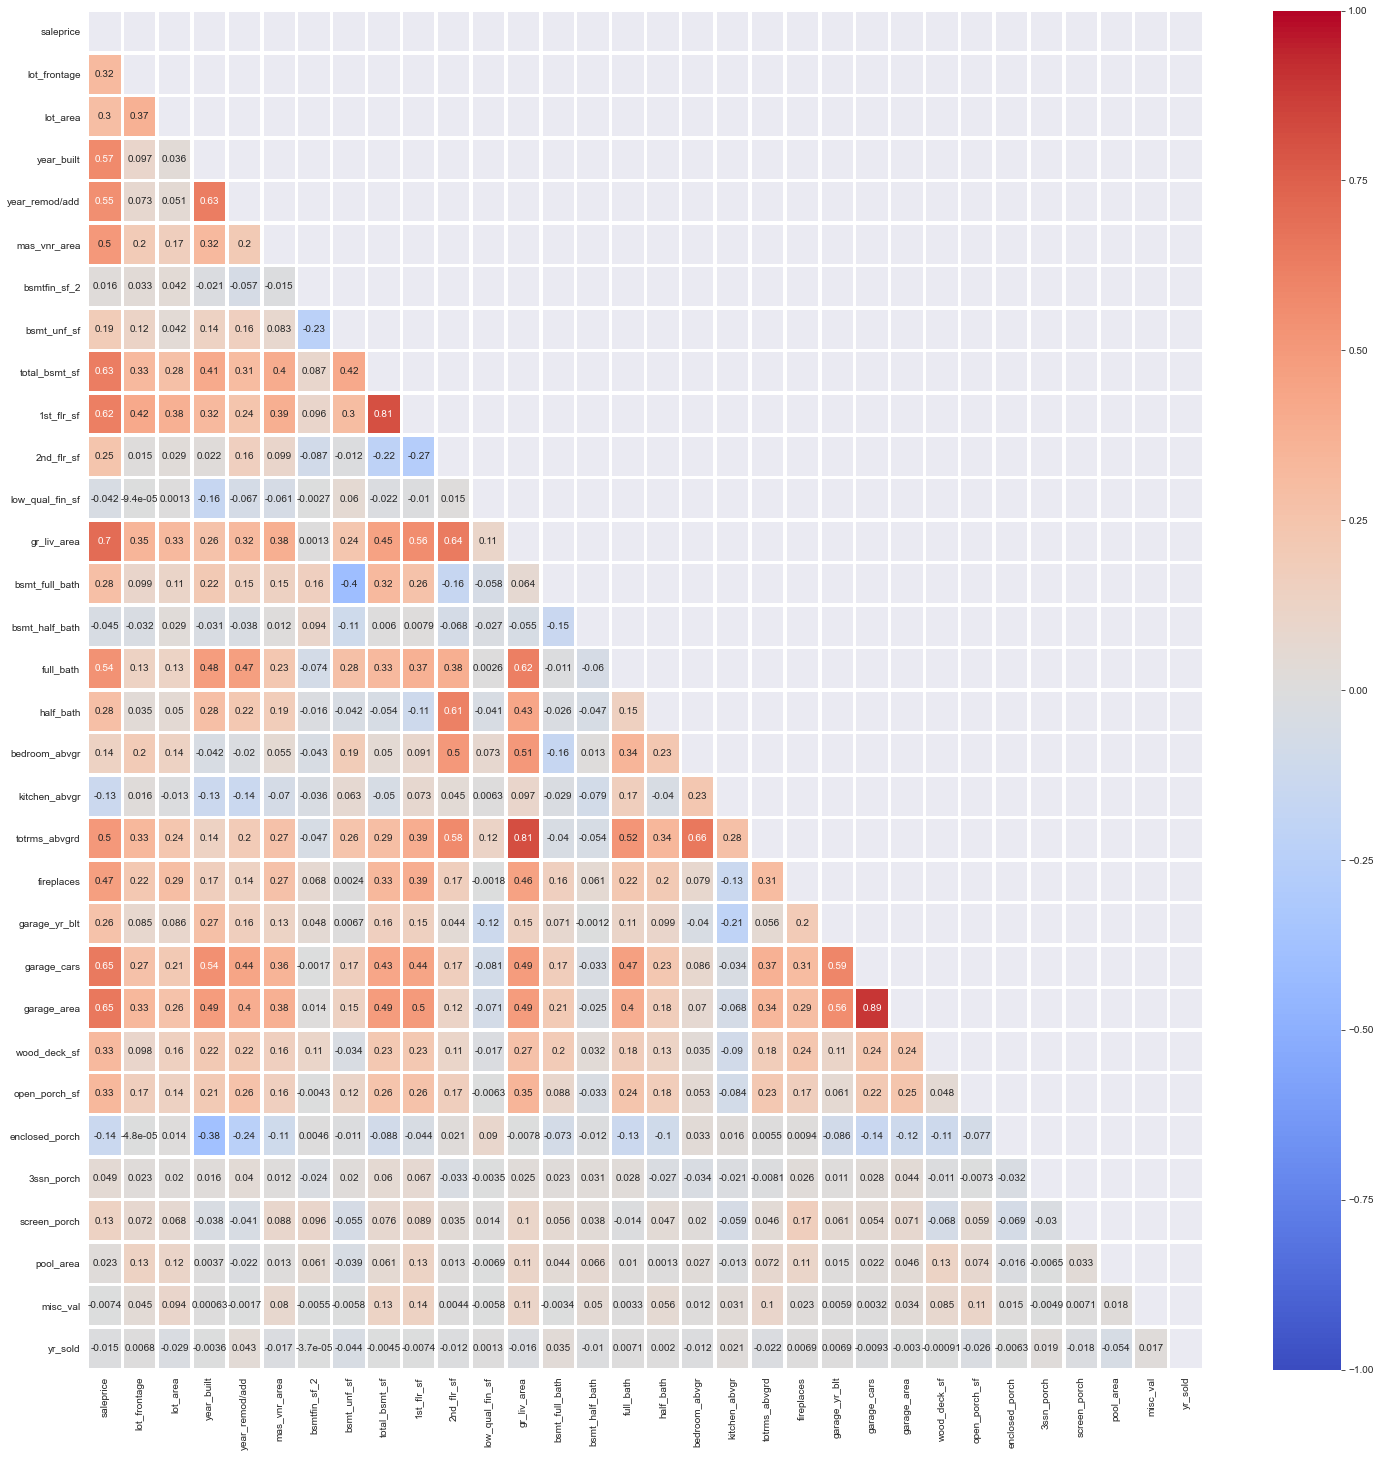

In [124]:
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,25))
sns.heatmap(df_numeric.corr(),
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=2.5,
            vmin=-1,
            vmax=1);

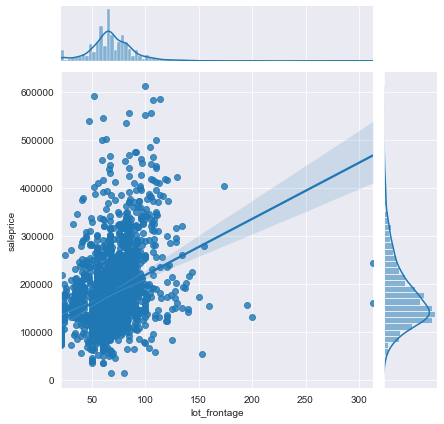

In [125]:
# lot_frontage and saleprice have a linear r-ship
sns.jointplot(x=df['lot_frontage'],y=df['saleprice'],kind="reg");

In [126]:
outlier_frontage = df[df['lot_frontage'] > 250] #outliers to drop
outlier_frontage

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1335    NA          2          HLS          4     Inside           0   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
960       Edwards       Feedr        Norm      2Story            10   
1335        Names        PosA        Norm      1Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1335             7        1960            2007       Flat   Tar&Grv   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1335      Wd Sdng      Wd Sdng         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1335           3     CBlock          4          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1335               6         425.0               1           0.0        160.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1335          585.0    GasA           5           Y           1        2069   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1335           0                0         2069             1.0   

      bsmt_half_bath  full_bath  ...  bedroom_abvgr  kitchen_abvgr  \
960              0.0          2  ...              3              1   
1335             0.0          2  ...              4              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
960              5             12           1           3             4   
1335             4              9           1           1             4   

      garage_type garage_yr_blt  garage_finish  garage_cars  garage_area  \
960        Attchd        2008.0              3          2.0       1418.0   
1335       Attchd        1960.0              2          2.0        505.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
960             3            3            2           214            292   
1335            3            3            2             0              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  fence  misc_val  \
960                0           0             0        480      0         0   
1335               0           0             0          0      0         0   

      mo_sold  yr_sold  sale_type saleprice  basement_overall  is_residential  \
960         1     2008        New    160000                20               1   
1335       11     2008         WD    242000                16               1   

      not_grvl_alley  land_contour_order  neighborhood_order  \
960                1                   1                   2   
1335               1                   3                   2   

      positive_condition1  positive_condition2  local_conditions  \
960                     0                    1                 1   
1335                    2                    1                 3   

      bldg_type_2FmCon  bldg_type_Duplx  bldg_type_TwnhsE  bldg_type_TwnhsI  \
960                  0                0                 0                 0   
1335                 0                0                 0                 0   

      hou

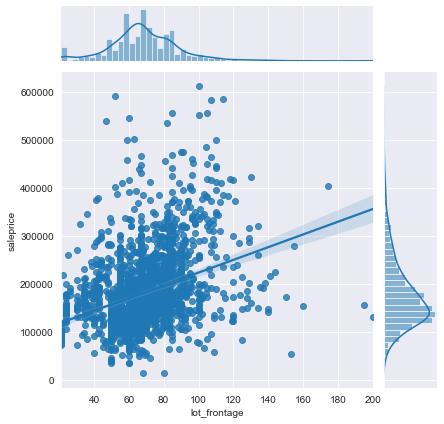

In [127]:
x_frontage = df[df['lot_frontage'] < 313]
sns.jointplot(x=x_frontage['lot_frontage'],y=x_frontage['saleprice'],kind="reg"); #r-ship without outliers look significantly more linear

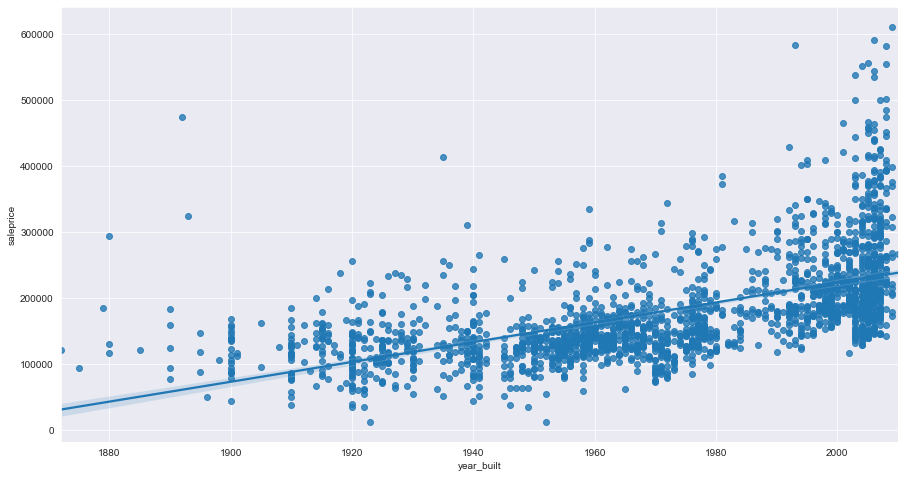

In [128]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['year_built'],y=df['saleprice']); #same for year that a house was built. I will make a column 'age' for age of house at time of sale

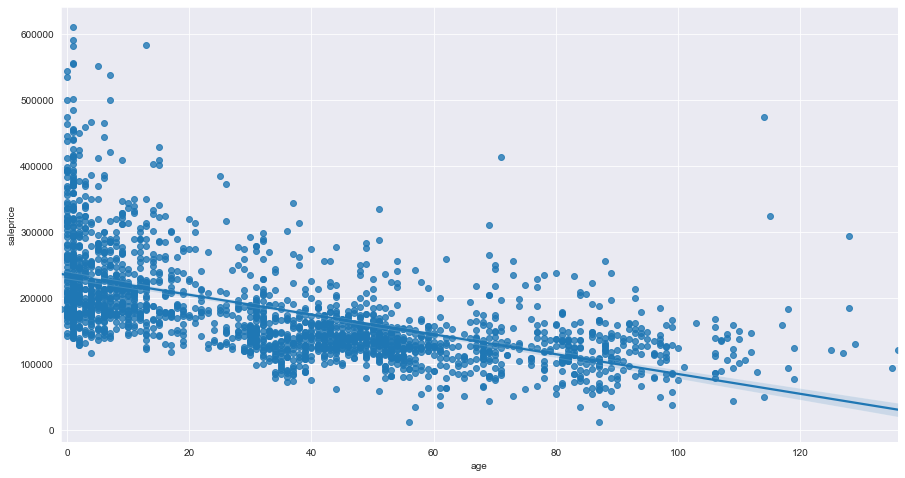

In [129]:
df['age'] = df['yr_sold'] - df['year_built'] #age of house at time of sale
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['age'],y=df['saleprice']);

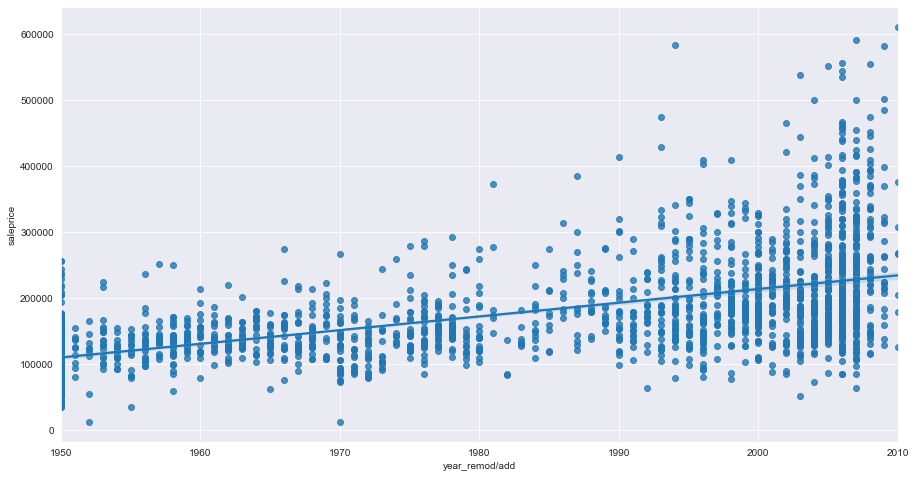

In [130]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['year_remod/add'],y=df['saleprice']);

In [131]:
df['was_remodeled'] =  df['year_remod/add'] - df['year_built'] #dummy for if house was remodeled
df['was_remodeled'] = [1 if i> 0 else 0 for i in df['was_remodeled']];

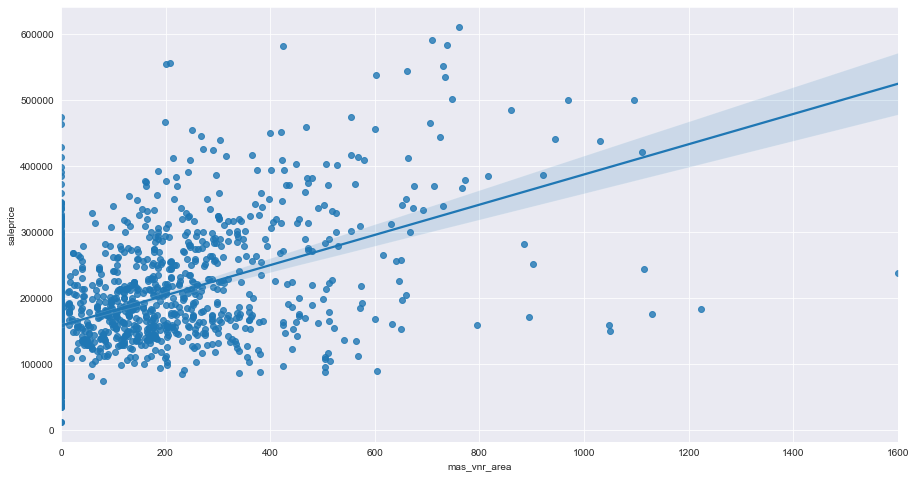

In [132]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['mas_vnr_area'],y=df['saleprice']); 

In [133]:
df['bsmt_type*sf_all'] = (df['bsmtfin_type_1'] * df['bsmtfin_sf_1']) + (df['bsmtfin_type_2'] * df['bsmtfin_sf_2']) #quality*sf interaction variable. Clear outliers

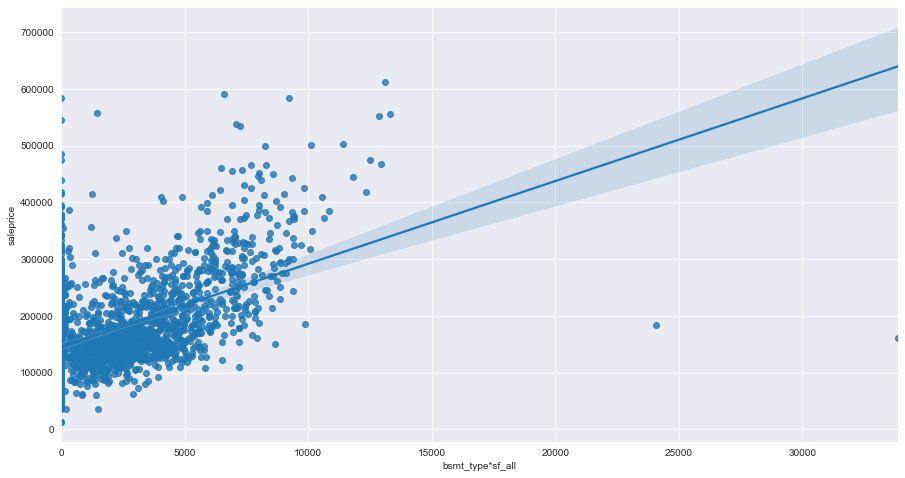

In [134]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['bsmt_type*sf_all'],y=df['saleprice']);

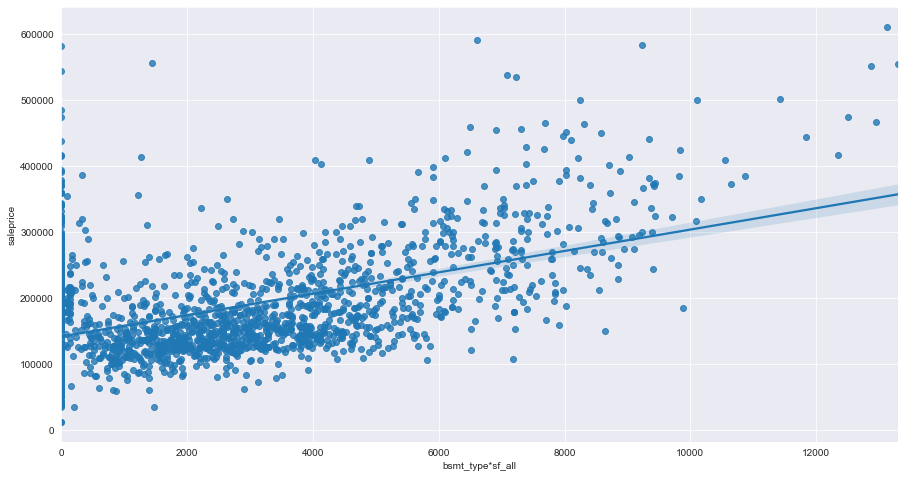

In [135]:
bsmt_no_outliers = df[df['bsmt_type*sf_all'] < 20000]
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=bsmt_no_outliers['bsmt_type*sf_all'],y=bsmt_no_outliers['saleprice']); #looks really nice with those outliers masked

In [136]:
df[df['bsmt_type*sf_all'] > 20000]  #outliers to drop

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
960       Edwards       Feedr        Norm      2Story            10   
1885      Edwards        Norm        Norm      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CemntBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  ...  totrms_abvgrd  functional  fireplaces  \
960              0.0          2  ...             12           1           3   
1885             1.0          2  ...             15           1           2   

      fireplace_qu  garage_type  garage_yr_blt  garage_finish  garage_cars  \
960              4       Attchd         2008.0              3          2.0   
1885             4       Attchd         2008.0              3          3.0   

     garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
960       1418.0            3            3            2           214   
1885      1154.0            3            3            2           546   

      open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
960             292               0           0             0        480   
1885            484               0           0             0          0   

      fence  misc_val  mo_sold  yr_sold  sale_type  saleprice  \
960       0         0        1     2008        New     160000   
1885      0     17000       10     2007        New     183850   

      basement_overall  is_residential not_grvl_alley  land_contour_order  \
960                 20               1              1                   1   
1885                20               1              1                   1   

      neighborhood_order  positive_condition1  positive_condition2  \
960                    2                    0                    1   
1885                   2                    1                    1   

      local_conditions  bldg_type_2FmCon  bldg_type_Duplx  bldg_type_TwnhsE  \
960                  1                 0                0                 0   
1885                 2                 0                0                 0   

      bldg_type_TwnhsI  house_style_condensed_1.5  house_style_condensed_2.0  \
960                  0                          0                          1   
1885                 0                          0           

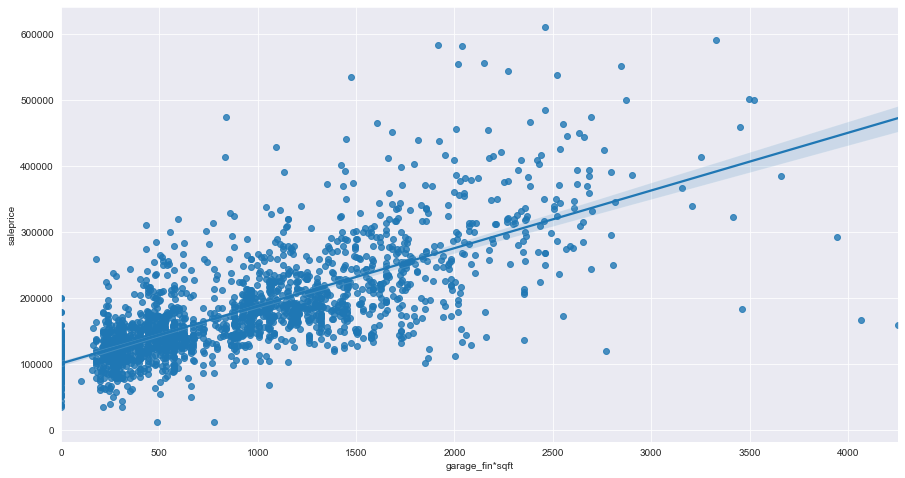

In [137]:
df['garage_fin*sqft'] = df['garage_area']*df['garage_finish'] #this is the man cave feature. I want a finished garage that is massive. A garage with a lot of space for crafting.
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['garage_fin*sqft'],y=df['saleprice']);

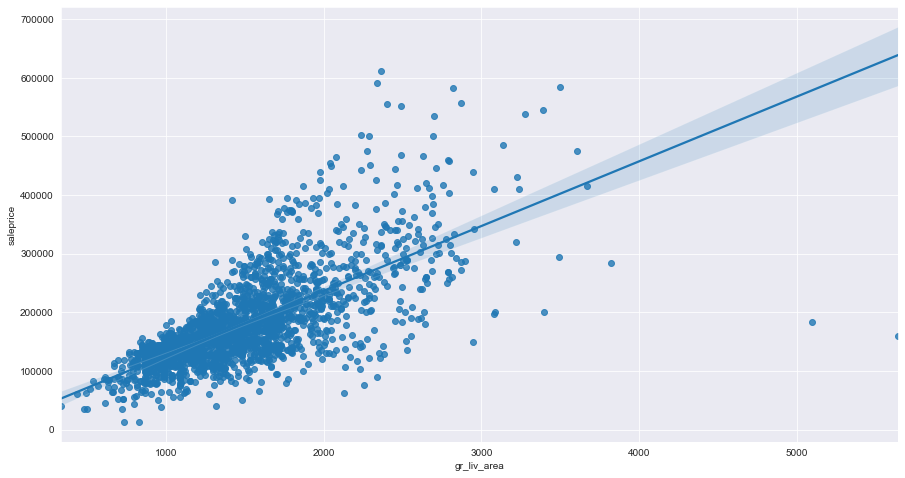

In [138]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['gr_liv_area'],y=df['saleprice']); # this is a great feature. As living space increases sales price strongly increases.

In [139]:
df['quality_above_sqft'] = (df['1st_flr_sf']+df['2nd_flr_sf']) - df['low_qual_fin_sf'] #People are paying for quality space more than they are looking for low quality space. 
# I'll combine these three into one and make a variable that is better than gr_liv_area while reducing 4 features into one. 

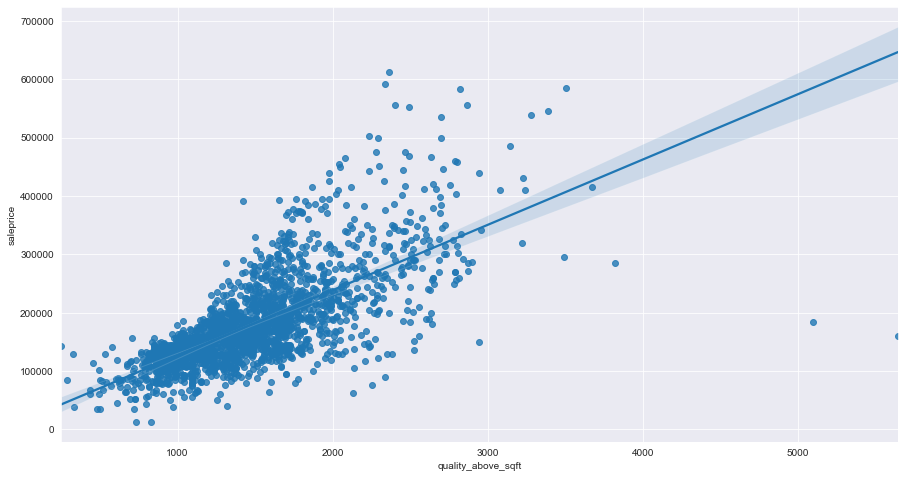

In [140]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['quality_above_sqft'],y=df['saleprice']); # beautiful. What's up with those outliers though?

In [141]:
df[df['1st_flr_sf']>4000] #same ID's as for basement and 1499 was outlier on frontage as well. These will be dropped.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
960       Edwards       Feedr        Norm      2Story            10   
1885      Edwards        Norm        Norm      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CemntBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  ...  fireplaces  fireplace_qu  garage_type  \
960              0.0          2  ...           3             4       Attchd   
1885             1.0          2  ...           2             4       Attchd   

      garage_yr_blt  garage_finish  garage_cars  garage_area  garage_qual  \
960          2008.0              3          2.0       1418.0            3   
1885         2008.0              3          3.0       1154.0            3   

     garage_cond  paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  \
960            3            2           214            292               0   
1885           3            2           546            484               0   

      3ssn_porch  screen_porch  pool_area  fence  misc_val  mo_sold  yr_sold  \
960            0             0        480      0         0        1     2008   
1885           0             0          0      0     17000       10     2007   

      sale_type  saleprice  basement_overall  is_residential  not_grvl_alley  \
960         New     160000                20               1               1   
1885        New     183850                20               1               1   

      land_contour_order neighborhood_order  positive_condition1  \
960                    1                  2                    0   
1885                   1                  2                    1   

      positive_condition2  local_conditions  bldg_type_2FmCon  \
960                     1                 1                 0   
1885                    1                 2                 0   

      bldg_type_Duplx  bldg_type_TwnhsE  bldg_type_TwnhsI  \
960                 0                 0                 0   
1885                0                 0                 0   

      house_style_condensed_1.5  house_style_condensed_2.0  is_hip_roof  \
960                           0                          1            1   
1885                          0                          0            1   

      exterior_ordina

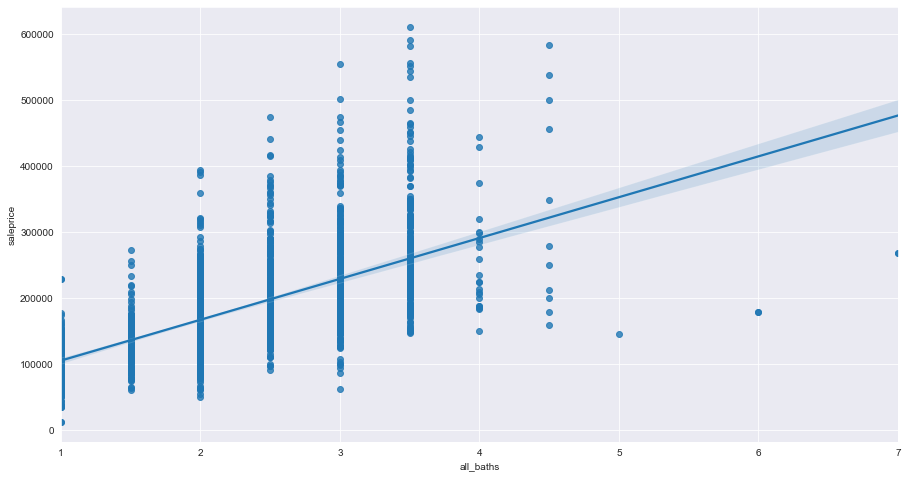

In [142]:
df['all_baths'] = df['bsmt_full_bath']+(df['bsmt_half_bath']/2)+df['full_bath']+(df['half_bath']/2) #I like this all bath feature, more how I think about baths in a home.
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['all_baths'],y=df['saleprice']);

In [143]:
df[df['all_baths'] == 7] #outliers

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1566  816  906230010           90        RL     66.759571     11855   Pave   
1605  817  906230020           90        RL     66.759571      7939   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
1566    NA          4          Lvl          4     Inside           3   
1605    NA          4          Lvl          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
1566      SawyerW        Norm        Norm      2Story             7   
1605      SawyerW       Feedr        Norm      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1566             5        2000            2000        Hip   CompShg   
1605             5        2000            2000        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
1566      VinylSd      VinylSd      BrkFace          23.0           3   
1605      VinylSd      VinylSd      BrkFace          23.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
1566           3      PConc          5          3              1   
1605           3      PConc          5          3              1   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
1566               6         820.0               1           0.0        348.0   
1605               6         820.0               1           0.0        348.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
1566         1168.0    GasA           5           Y           1        1168   
1605         1168.0    GasA           5           Y           1        1168   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1566        1619                0         2787             2.0   
1605        1619                0         2787             2.0   

      bsmt_half_bath  full_bath  ...  fireplace_qu  garage_type  \
1566             0.0          4  ...             3      BuiltIn   
1605             0.0          4  ...             3      BuiltIn   

      garage_yr_blt  garage_finish  garage_cars  garage_area  garage_qual  \
1566         2000.0              3          4.0        820.0            3   
1605         2000.0              3          4.0        820.0            3   

      garage_cond paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  \
1566            3           2           312              0               0   
1605            3           2           312              0               0   

      3ssn_porch  screen_porch  pool_area  fence  misc_val  mo_sold  yr_sold  \
1566           0             0          0      0         0       10     2009   
1605           0             0          0      0         0       10     2009   

      sale_type  saleprice  basement_overall  is_residential  not_grvl_alley  \
1566         WD     269500                 5               1               1   
1605         WD     269500                 5               1               1   

      land_contour_order  neighborhood_order positive_condition1  \
1566                   1                   3                   1   
1605                   1                   3                   0   

      positive_condition2  local_conditions  bldg_type_2FmCon  \
1566                    1                 2                 0   
1605                    1                 1                 0   

      bldg_type_Duplx  bldg_type_TwnhsE  bldg_type_TwnhsI  \
1566                1                 0                 0   
1605                1                 0                 0   

      house_style_condensed_1.5  house_style_condensed_2.0  is_hip_roof  \
1566                          0                          1            1   
1605                          0                          1            1   

      exterior_ordinal1  exterior_ordinal2  external_featur

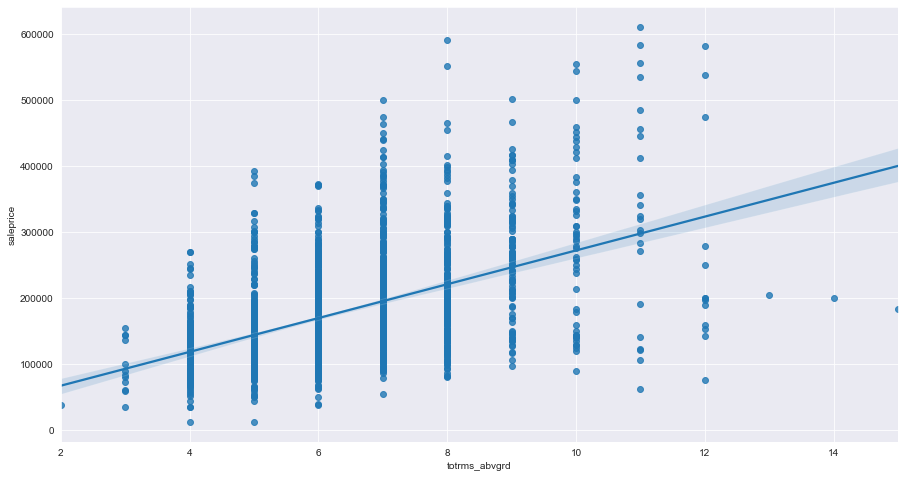

In [144]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['totrms_abvgrd'],y=df['saleprice']); #this is a model feature

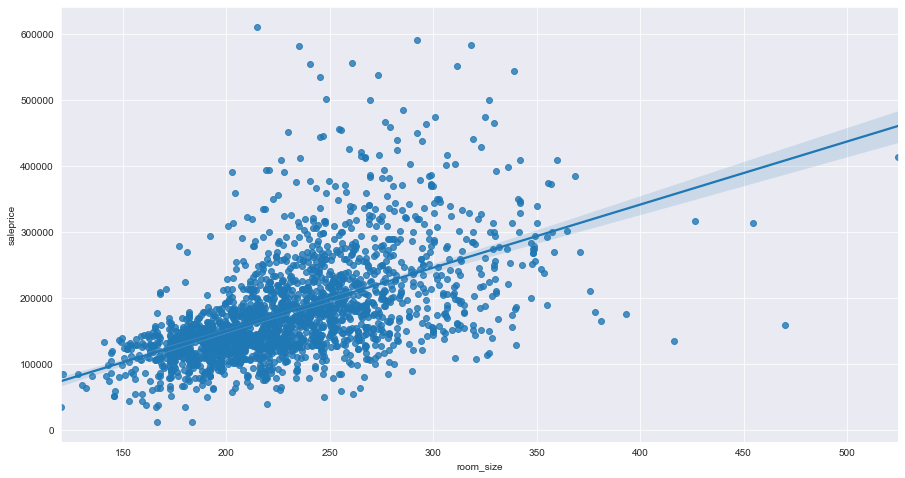

In [145]:
df['room_size'] = df['gr_liv_area'] / (df['totrms_abvgrd']) #sqft per room w/o baths. This performs better than with baths. I want a measure of the size of the rooms in houses.
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['room_size'],y=df['saleprice']);

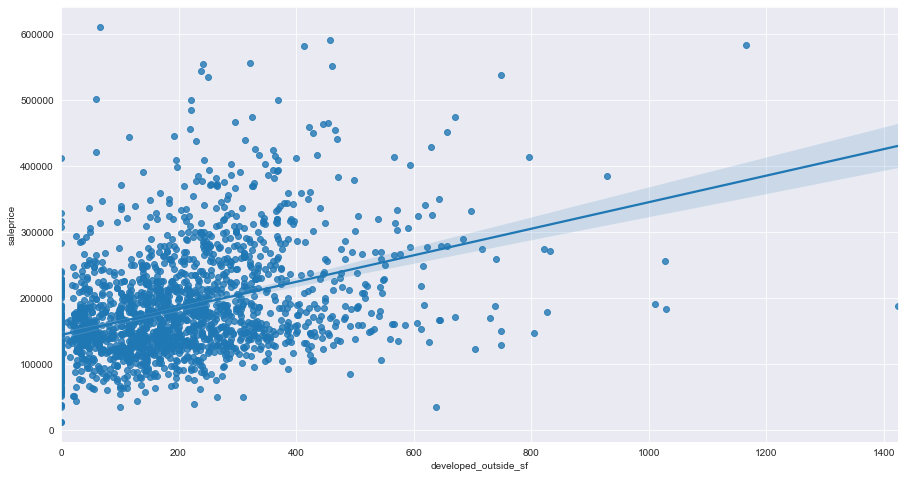

In [146]:
#combine different porches. Trying to measure developed outside space for houses. 
fig, ax = plt.subplots(figsize=(15,8))
df['developed_outside_sf'] = df['open_porch_sf']+ df['screen_porch'] + df['enclosed_porch'] +df['3ssn_porch'] +df['wood_deck_sf'] 
sns.regplot(x=df['developed_outside_sf'],y=df['saleprice']); 

### Numeric category 

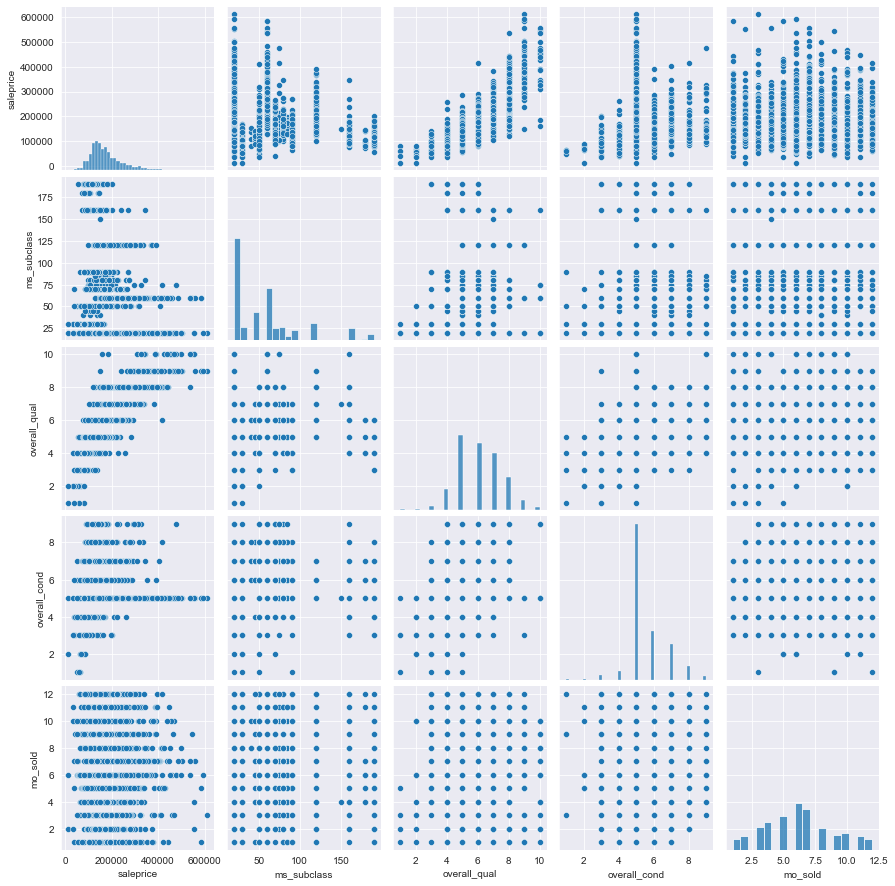

In [147]:
# EDA on numeric features
sns.pairplot(df_numeric_category);

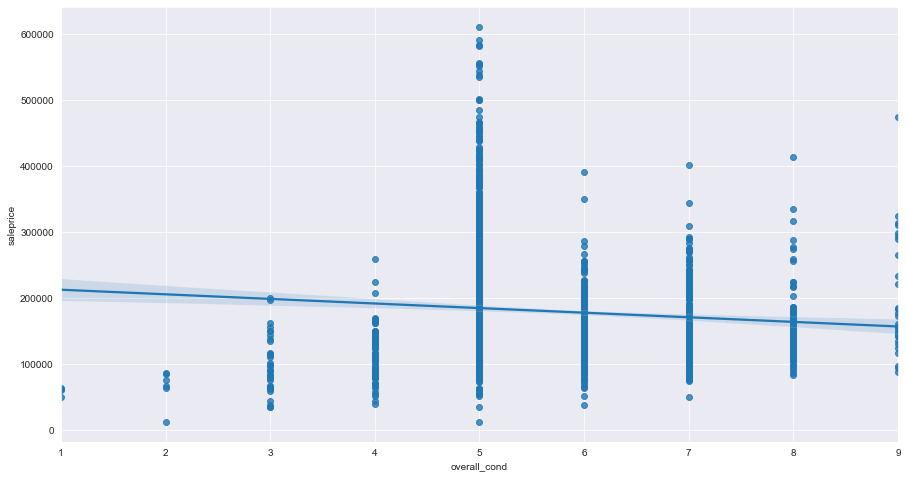

In [148]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=df['overall_cond'],y=df['saleprice']); 

In [149]:
pd.options.display.max_columns = 100
df.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL     54.734375     13517   Pave    NA   

   lot_shape land_contour  utilities lot_config  land_slope neighborhood  \
0          3          Lvl          4    CulDSac           3       Sawyer   

  condition_1 condition_2 house_style  overall_qual  overall_cond  year_built  \
0        RRAe        Norm      2Story             6             8        1976   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   

   mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  bsmt_cond  \
0         289.0           4           3     CBlock          3          3   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  \
0              1               6         533.0               1           0.0   

   bsmt_unf_sf  total_bsmt_sf heating  heating_qc central_air  electrical  \
0        192.0          725.0    GasA           5           Y           1   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   

   bsmt_half_bath  full_bath  ...  garage_yr_blt  garage_finish  garage_cars  \
0             0.0          2  ...         1976.0              2          2.0   

   garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
0        475.0            3            3            2             0   

  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  fence  \
0            44               0           0             0          0      0   

   misc_val  mo_sold  yr_sold  sale_type  saleprice  basement_overall  \
0         0        3     2010         WD     130500                 3   

   is_residential  not_grvl_alley  land_contour_order  neighborhood_order  \
0               1               1                   1                   2   

   positive_condition1  positive_condition2 local_conditions  \
0                    0                    1                1   

   bldg_type_2FmCon  bldg_type_Duplx  bldg_type_TwnhsE  bldg_type_TwnhsI  \
0                 0                0                 0                 0   

   house_style_condensed_1.5  house_style_condensed_2.0  is_hip_roof  \
0                          0                          1            0   

   exterior_ordinal1  exterior_ordinal2  external_feature  stone_brkface  \
0                  3                  4                 7        BrkFace   

   foundation_order  steam_heating  garage_type_order  sale_type_order  age  \
0                 2              1                  3                2   34   

   was_remodeled  bsmt_type*sf_all  garage_fin*sqft quality_above_sqft  \
0              1            3198.0            950.0               1479   

   all_baths  room_size  developed_outside_sf  
0        2.5      246.5                    44  

[1 rows x 109 columns]

# Features to be kept to be used on the machine learning. 
Keeping 33 out of the inital 80 features

In [150]:
df_evaluation =  df[['saleprice','age','neighborhood_order','local_conditions','was_remodeled','overall_qual', 
                  'house_style_condensed_1.5', 'house_style_condensed_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_TwnhsI','bldg_type_2FmCon', 'is_hip_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','developed_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size',
                 'not_grvl_alley','land_contour_order']]


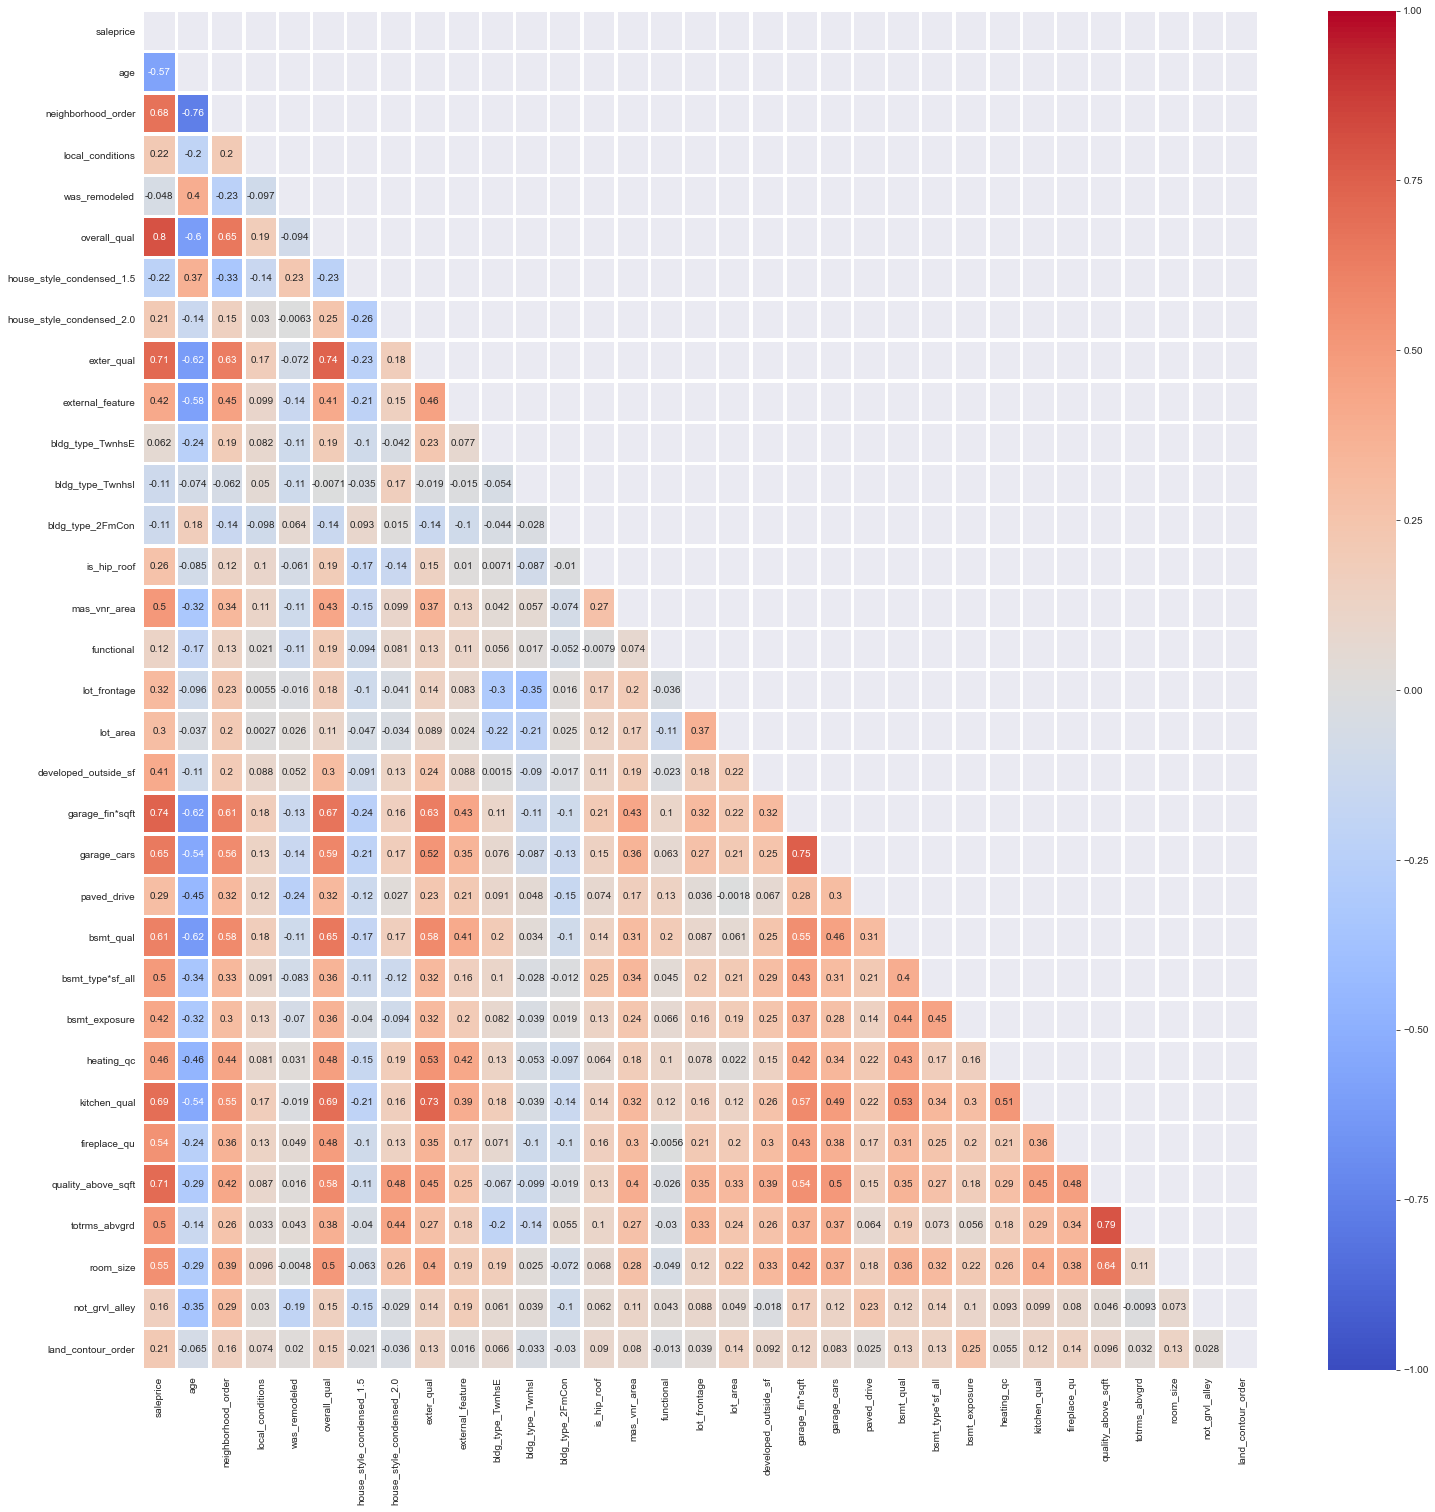

In [151]:
mask = np.zeros_like(df_evaluation.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,25))
sns.heatmap(df_evaluation.corr(),
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=2.5,
            vmin=-1,
            vmax=1
);

### Dropping Outliers
Dropping rows where the price is likely to skew the ML models. 

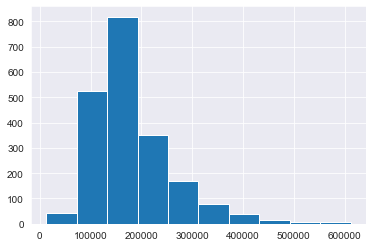

In [152]:
df['saleprice'].hist();

In [153]:
df['saleprice'].describe().T

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [154]:
#3 stdevs from the mean 
print(f'Four + stdevs from mean {(79258.659352*4)+181469.701609}. Where max is 611657.000000' )
print(f'Three - stdevs from mean {(-79258.659352*3)+181469.701609}. Where min is 12789.000000')

Four + stdevs from mean 498504.33901700005. Where max is 611657.000000
Three - stdevs from mean -56306.27644700001. Where min is 12789.000000


In [155]:
df[(df['saleprice'] > 498504.33901700005)] #13 houses 4 stdevs from the mean. Remove as outliers.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
81     367  527214050           20        RL          63.0     17423   Pave   
138   2331  527210040           60        RL          60.0     18062   Pave   
151   2333  527212030           60        RL          85.0     16056   Pave   
623    457  528176030           20        RL         100.0     14836   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
823     16  527216070           60        RL          47.0     53504   Pave   
1164   424  528106020           20        RL         105.0     15431   Pave   
1227    47  528176010           20        RL         110.0     14300   Pave   
1592  2335  527214060           60        RL          82.0     16052   Pave   
1671    45  528150070           20        RL         100.0     12919   Pave   
1692  2451  528360050           60        RL         114.0     17242   Pave   
1796   434  528110090           60        RL         107.0     13891   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
81      NA          3          Lvl          4    CulDSac           3   
138     NA          3          HLS          4    CulDSac           3   
151     NA          3          Lvl          4     Inside           3   
623     NA          3          HLS          4     Inside           0   
800     NA          2          Lvl          4    CulDSac           3   
823     NA          2          HLS          4    CulDSac           0   
1164    NA          4          Lvl          4     Inside           3   
1227    NA          4          HLS          4     Inside           0   
1592    NA          3          Lvl          4    CulDSac           3   
1671    NA          3          Lvl          4     Inside           3   
1692    NA          3          Lvl          4     Inside           3   
1796    NA          4          Lvl          4     Inside           3   
1964    NA          3          Lvl          4    CulDSac           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
81        StoneBr        Norm        Norm      1Story             9   
138       StoneBr        Norm        Norm      2Story            10   
151       StoneBr        Norm        Norm      2Story             9   
623       NridgHt        Norm        Norm      1Story            10   
800       NridgHt        Norm        Norm      1Story            10   
823       StoneBr        Norm        Norm      2Story             8   
1164      NridgHt        Norm        Norm      1Story            10   
1227      NridgHt        Norm        Norm      1Story             9   
1592      StoneBr        Norm        Norm      2Story            10   
1671      NridgHt        Norm        Norm      1Story             9   
1692      NoRidge        Norm        Norm      2Story             9   
1796      NridgHt        Norm        Norm      2Story             9   
1964      StoneBr        PosN        Norm      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
81               5        2008            2009        Hip   CompShg   
138              5        2006            2006        Hip   CompShg   
151              5        2005            2006        Hip   CompShg   
623              5        2004            2005        Hip   CompShg   
800              5        2007            2007        Hip   CompShg   
823              5        2003            2003        Hip   CompShg   
1164             5        2008            2008        Hip   CompShg   
1227             5        2003            2004        Hip   CompShg   
1592             5        2006            2006        Hip   CompShg   
1671             5        2009            2010        Hip   CompShg   
1692             5        1993            1994        Hip   CompShg   
1796             5        2008            200

In [156]:
#dropping houses with prices > 4stdevs from average. There are no houses with <3 stdevs from average
df = df[(df['saleprice'] < 498504.33901700005)]

In [157]:
df[(df['year_built']<1899) & (df['saleprice']>290000)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1035  2667  902400110           75        RM          90.0     22950   Pave   
1141  1321  902401120           75        RM          75.0     13500   Pave   
1939  1307  902207220           75        RM          87.0     18386   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
1035    NA          2          Lvl          4     Inside           3   
1141    NA          4          Lvl          4     Inside           3   
1939    NA          4          Lvl          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
1035      OldTown      Artery        Norm      2.5Fin            10   
1141      OldTown      Artery        PosA      2.5Unf            10   
1939      OldTown        Norm        Norm      2.5Fin             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1035             9        1892            1993      Gable   WdShngl   
1141             9        1893            2000      Gable   CompShg   
1939             9        1880            2002      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
1035      Wd Sdng      Wd Sdng         None           0.0           4   
1141      Wd Sdng      Wd Sdng         None           0.0           5   
1939      CemntBd      CemntBd         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
1035           4     BrkTil          3          3              2   
1141           5     BrkTil          3          3              1   
1939           3     BrkTil          3          3              1   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
1035               1           0.0               1           0.0       1107.0   
1141               1           0.0               1           0.0       1237.0   
1939               1           0.0               1           0.0       1470.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
1035         1107.0    GasA           5           Y           1        1518   
1141         1237.0    GasA           4           Y           1        1521   
1939         1470.0    GasA           5           Y           1        1675   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1035        1518              572         3608             0.0   
1141        1254                0         2775             0.0   
1939        1818                0         3493             0.0   

      bsmt_half_bath  full_bath  ...  garage_yr_blt  garage_finish  \
1035             0.0          2  ...         1993.0              1   
1141             0.0          3  ...         1988.0              1   
1939             0.0          3  ...         2003.0              1   

      garage_cars  garage_area  garage_qual  garage_cond  paved_drive  \
1035          3.0        840.0            5            3            2   
1141          2.0        880.0            4            3            2   
1939          3.0        870.0            3            3            2   

      wood_deck_sf open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
1035             0           260               0           0           410   
1141           105           502               0           0             0   
1939           302             0               0           0             0   

      pool_area  fence  misc_val  mo_sold  yr_sold  sale_type  saleprice  \
1035          0      4         0        6     2006         WD     475000   
1141          0      0         0        7     2008         WD     325000   
1939          0      0         0        5     2008         WD     295000   

      basement_overall  is_residential  not_grvl_alley  land_contour_order  \
1035                 6               1               1                   1   
1141       

In [158]:
#drop these so age works as a predictor of sales price. Are these historic houses?
df = df[df['id'] != 2667]
df = df[df['id'] != 1321]
df = df[df['id'] != 1307]

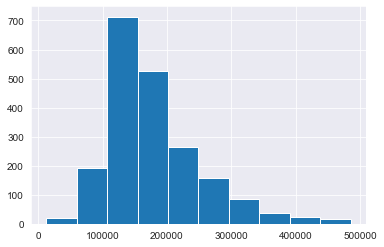

In [159]:
df['saleprice'].hist();

In [160]:
df[df['id'].isin([1499, 2181])]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
960       Edwards       Feedr        Norm      2Story            10   
1885      Edwards        Norm        Norm      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CemntBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  ...  garage_yr_blt  garage_finish  \
960              0.0          2  ...         2008.0              3   
1885             1.0          2  ...         2008.0              3   

      garage_cars  garage_area  garage_qual  garage_cond  paved_drive  \
960           2.0       1418.0            3            3            2   
1885          3.0       1154.0            3            3            2   

      wood_deck_sf open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
960            214           292               0           0             0   
1885           546           484               0           0             0   

      pool_area  fence  misc_val  mo_sold  yr_sold  sale_type  saleprice  \
960         480      0         0        1     2008        New     160000   
1885          0      0     17000       10     2007        New     183850   

      basement_overall  is_residential  not_grvl_alley  land_contour_order  \
960                 20               1               1                   1   
1885                20               1               1                   1   

      neighborhood_order  positive_condition1  positive_condition2  \
960                    2                    0                    1   
1885                   2                    1                    1   

     local_conditions  bldg_type_2FmCon  bldg_type_Duplx  bldg_type_TwnhsE  \
960                 1                 0                0                 0   
1885                2                 0                0                 0   

      bldg_type_TwnhsI  house_style_condensed_1.5  house_style_condensed_2.0  \
960                  0                          0                          1   
1885                 0                          0                          0   

      is_hip_roof  exterior_ordinal1  exterior_ordinal2  external_feature  \
960             1                  2                  2                 4   
1885            1                  5            

In [161]:
#dropping sqft outliers for basement/frontage/first floor
df = df[df['id'] != 1499]
df = df[df['id'] != 2181]

In [162]:
df_evaluation =  df[['saleprice','age','neighborhood_order','local_conditions','was_remodeled','overall_qual', 
                  'house_style_condensed_1.5', 'house_style_condensed_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_TwnhsI','bldg_type_2FmCon', 'is_hip_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','developed_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size',
                 'not_grvl_alley','land_contour_order']]

# Cleaned Dataset
Running a last check on the dataset for evaluation before saving it as train_clean.csv 

In [163]:
df_evaluation.shape

(2033, 33)

In [164]:
df_evaluation.describe().T

count           mean           std      min  \
saleprice                  2033.0  178849.543532  73440.103247  12789.0   
age                        2033.0      36.192327     30.035427      0.0   
neighborhood_order         2033.0       2.559764      1.000735      1.0   
local_conditions           2033.0       1.892277      0.403850      0.0   
was_remodeled              2033.0       0.460895      0.498591      0.0   
overall_qual               2033.0       6.083620      1.397725      1.0   
house_style_condensed_1.5  2033.0       0.137727      0.344699      0.0   
house_style_condensed_2.0  2033.0       0.299065      0.457961      0.0   
exter_qual                 2033.0       3.394491      0.574909      2.0   
external_feature           2033.0       7.749139      2.032955      2.0   
bldg_type_TwnhsE           2033.0       0.079193      0.270107      0.0   
bldg_type_TwnhsI           2033.0       0.033940      0.181119      0.0   
bldg_type_2FmCon           2033.0       0.022627      0.148747      0.0   
is_hip_roof                2033.0       0.195770      0.396890      0.0   
mas_vnr_area               2033.0      94.284801    165.387579      0.0   
functional                 2033.0       0.933596      0.249049      0.0   
lot_frontage               2033.0      68.580457     20.865808     21.0   
lot_area                   2033.0    9939.434333   6472.912858   1300.0   
developed_outside_sf       2033.0     180.685686    156.400223      0.0   
garage_fin*sqft            2033.0     902.987703    652.070693      0.0   
garage_cars                2033.0       1.765863      0.760928      0.0   
paved_drive                2033.0       1.832268      0.536926      0.0   
bsmt_qual                  2033.0       3.480079      0.896582      0.0   
bsmt_type*sf_all           2033.0    2387.641417   2505.929101      0.0   
bsmt_exposure              2033.0       1.616331      1.069609      0.0   
heating_qc                 2033.0       4.151500      0.965278      1.0   
kitchen_qual               2033.0       3.505657      0.655903      2.0   
fireplace_qu               2033.0       1.743237      1.801406      0.0   
quality_above_sqft         2033.0    1474.505657    472.290935    249.0   
totrms_abvgrd              2033.0       6.400394      1.510801      2.0   
room_size                  2033.0     231.192394     44.747013    120.0   
not_grvl_alley             2033.0       0.958190      0.200204      0.0   
land_contour_order         2033.0       1.100836      0.412841      1.0   

                                     25%            50%            75%  \
saleprice                  129500.000000  161000.000000  213000.000000   
age                             7.000000      34.000000      54.000000   
neighborhood_order              2.000000       3.000000       3.000000   
local_conditions                2.000000       2.000000       2.000000   
was_remodeled                   0.000000       0.000000       1.000000   
overall_qual                    5.000000       6.000000       7.000000   
house_style_condensed_1.5       0.000000       0.000000       0.000000   
house_style_condensed_2.0       0.000000       0.000000       1.000000   
exter_qual                      3.000000       3.000000       4.000000   
external_feature                6.000000       7.000000      10.000000   
bldg_type_TwnhsE                0.000000       0.000000       0.000000   
bldg_type_TwnhsI                0.000000       0.000000       0.000000   
bldg_type_2FmCon                0.000000       0.000000       0.000000   
is_hip_roof                     0.000000       0.000000       0.000000   
mas_vnr_area                    0.000000       0.000000     150.000000   
functional                      1.000000       1.000000       1.000000   
lot_frontage                   59.000000      66.759571      80.000000   
lot_area                     7500.000000    9373.000000   11428.000000   
developed_outside_sf           48.000000     163.000000     266.000000 

In [165]:
df_evaluation.head()

saleprice  age  neighborhood_order  local_conditions  was_remodeled  \
0     130500   34                   2                 1              1   
1     220000   13                   3                 2              1   
2     109000   57                   2                 2              1   
3     174000    4                   4                 2              1   
4     138500  110                   3                 2              1   

   overall_qual  house_style_condensed_1.5  house_style_condensed_2.0  \
0             6                          0                          1   
1             7                          0                          1   
2             5                          0                          0   
3             5                          0                          1   
4             6                          1                          0   

   exter_qual  external_feature  bldg_type_TwnhsE  bldg_type_TwnhsI  \
0           4                 7                 0                 0   
1           4                10                 0                 0   
2           3                10                 0                 0   
3           3                10                 0                 0   
4           3                 7                 0                 0   

   bldg_type_2FmCon  is_hip_roof  mas_vnr_area  functional  lot_frontage  \
0                 0            0         289.0           1     54.734375   
1                 0            0         132.0           1     43.000000   
2                 0            0           0.0           1     68.000000   
3                 0            0           0.0           1     73.000000   
4                 0            0           0.0           1     82.000000   

   lot_area  developed_outside_sf  garage_fin*sqft  garage_cars  paved_drive  \
0     13517                    44            950.0          2.0            2   
1     11492                    74           1118.0          2.0            2   
2      7922                    52            246.0          1.0            2   
3      9802                   100           1200.0          2.0            2   
4     14235                    59            484.0          2.0            0   

   bsmt_qual  bsmt_type*sf_all  bsmt_exposure  heating_qc  kitchen_qual  \
0          3            3198.0              1           5             4   
1          4            3822.0              1           5             4   
2          3            4386.0              1           3             4   
3          4               0.0              1           4             3   
4          2               0.0              1           3             3   

   fireplace_qu  quality_above_sqft  totrms_abvgrd   room_size  \
0             0                1479              6  246.500000   
1             3                2122              8  265.250000   
2             0                1057              5  211.400000   
3             0                1444              7  206.285714   
4             0                1445              6  240.833333   

   not_grvl_alley  land_contour_order  
0               1                   1  
1               1                   1  
2               1                   1  
3               1                   1  
4               1                   1

In [166]:
df_evaluation.dtypes

saleprice                      int64
age                            int64
neighborhood_order             int64
local_conditions               int64
was_remodeled                  int64
overall_qual                   int64
house_style_condensed_1.5      uint8
house_style_condensed_2.0      uint8
exter_qual                     int64
external_feature               int64
bldg_type_TwnhsE               uint8
bldg_type_TwnhsI               uint8
bldg_type_2FmCon               uint8
is_hip_roof                    int64
mas_vnr_area                 float64
functional                     int64
lot_frontage                 float64
lot_area                       int64
developed_outside_sf           int64
garage_fin*sqft              float64
garage_cars                  float64
paved_drive                    int64
bsmt_qual                      int64
bsmt_type*sf_all             float64
bsmt_exposure                  int64
heating_qc                     int64
kitchen_qual                   int64
f

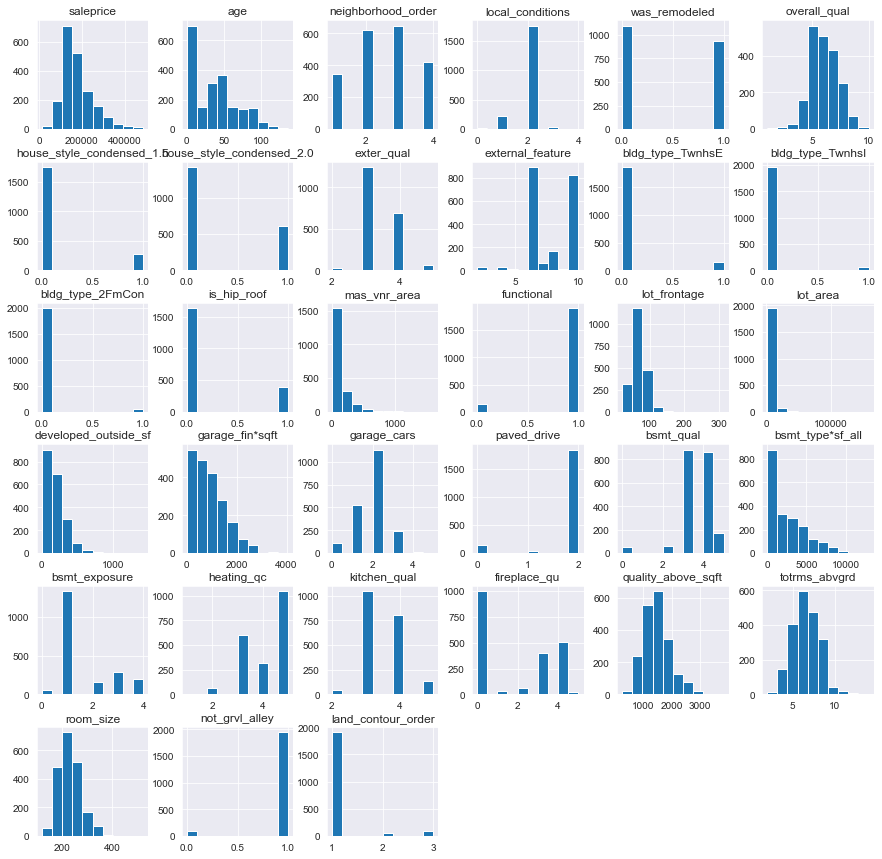

In [167]:
df_evaluation.hist(figsize=(15, 15));

In [168]:
#copy cleaned dataset to the datasets folder
df_evaluation.to_csv('../datasets/train_clean.csv', index=False)

- Is it clear what the student plans to do? 
- What type of model will be developed? - LinearRegression, Ridge, Lasso, ElasticNet
- How will success be evaluated?
- Is the scope of the project appropriate? 
- Is it clear who cares about this or why this is important to investigate? 
- Does the student consider the audience and the primary and secondary stakeholders? -Target audience: Novice property flippers, and applicable for home buyers & sellers